### Null columns analysis

In [5]:
#loading data from storage without NULL values
import pandas as pd
import numpy as np
df_1 =pd.read_csv("train_preprocessed_with NULL.csv")

In [4]:
X_test_data=pd.read_csv("test.csv")
X_test_data=X_test_data.drop(itemlist,axis=1)
print("test_data dimension is: ", X_test_data.shape)
X_test_data.columns

test_data dimension is:  (173836, 265)


Index(['Original_Quote_Date', 'Field7', 'Field8', 'Field10', 'Field11',
       'Field12', 'CoverageField1A', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A',
       ...
       'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
       'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
       'GeographicField62A', 'GeographicField62B', 'GeographicField63',
       'GeographicField64'],
      dtype='object', length=265)

#### Missing value imputation & NULL value analysis

#### Check points
* How many NULL values ae present for each column
* Whether removing NULL rows is feasible
* Mode method for imputation.
* Adding new column for each NULL value having column which indicates the presence/absence of value as 0 & 1
* Model based imputation is tried out for column having higher number of NA 

In [76]:
#https://www.datasciencelearner.com/drop-unnamed-column-pandas/#:~:text=Method%201%3A%20Use%20the%20index,the%20unnamed%20column%20in%20pandas.
df_1=df_1.drop("Unnamed: 0",axis=1)
print("\ndimension of train is :",df_1.shape)


dimension of train is : (260753, 268)


In [7]:
#df.isnull().any()  --->return the boolean for all the columns
print("The remaining which have NA values in X-train are: \n",dict(df_1[df_1.columns[df_1.isnull().any()]].apply(lambda x: x.isna().sum())))
train_null=dict(df_1[df_1.columns[df_1.isnull().any()]].apply(lambda x: x.isna().sum()))

#df.isnull().any()  --->return the boolean for all the columns
print("The remaining which have NA values in X-test are: \n",dict(X_test_data[X_test_data.columns[X_test_data.isnull().any()]].apply(lambda x: x.isna().sum())))
test_null=dict(X_test_data[X_test_data.columns[X_test_data.isnull().any()]].apply(lambda x: x.isna().sum()))

The remaining which have NA values in X-train are: 
 {'PersonalField84': 124208, 'PersonalField7': 113, 'PropertyField3': 81, 'PropertyField4': 63, 'PropertyField32': 70, 'PropertyField34': 70, 'PropertyField36': 113, 'PropertyField38': 1220, 'GeographicField63': 2}
The remaining which have NA values in X-test are: 
 {'PersonalField7': 69, 'PersonalField84': 82812, 'PropertyField3': 69, 'PropertyField4': 52, 'PropertyField30': 1, 'PropertyField32': 41, 'PropertyField34': 41, 'PropertyField36': 67, 'PropertyField38': 846}


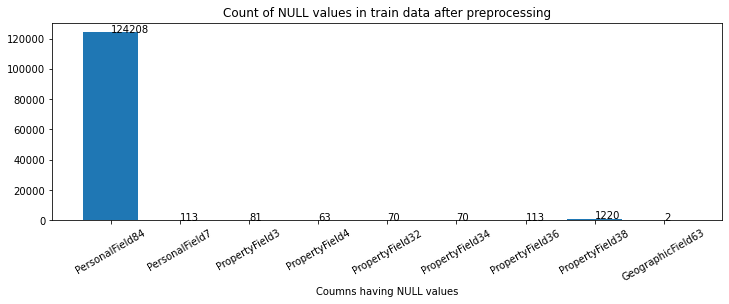

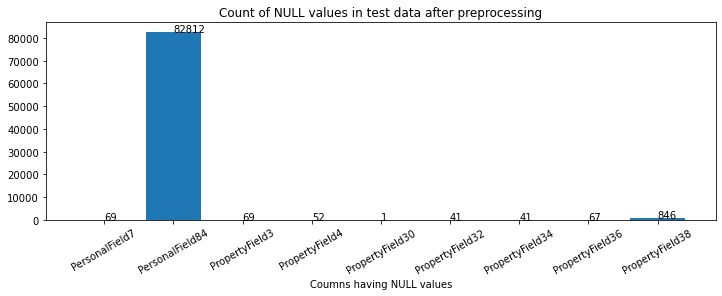

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.title("Count of NULL values in train data after preprocessing")
plt.bar(train_null.keys(),train_null.values())
plt.xlabel("Coumns having NULL values")
plt.xticks(rotation=30)
for a,b in train_null.items(): 
  plt.text(a, b, str(round(b,2)))

plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
plt.title("Count of NULL values in test data after preprocessing")
plt.bar(test_null.keys(),test_null.values())
plt.xlabel("Coumns having NULL values")
plt.xticks(rotation=30)
for a,b in test_null.items(): 
  plt.text(a, b, str(round(b,2)))
plt.show()


#### Observations:
* All the missing values columns are numerical features
* PersonalField84 column is having more than 9 times mising values from other columns

#### Following methods are used to deal with missing values
1. Mode based imputation
2. Model Based Imputation(Here logistic regression is used)
3. Removing the records with NULL values -- makes the data loss
4. Capturing NaN by new feature addition 

##### References
* https://www.numpyninja.com/post/feature-engineering-handling-missing-data-with-python
* https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook
* https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/notebook
* https://www.kaggle.com/code/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i/notebook


### Processing the train & test file along with Imputation methods

* This test file does not have the QuoteConversionFlag in it

In [3]:
import pickle
with open ('dropped_columns', 'rb') as fp:
    itemlist = pickle.load(fp)

In [4]:
import pandas as pd
X_train_input=pd.read_csv("train.csv")
X_train_input=X_train_input.drop(itemlist,axis=1)
y_train_final=X_train_input['QuoteConversion_Flag']
X_train_input = X_train_input.drop(['QuoteConversion_Flag'],axis=1)
print("train_data dimension is: ", X_train_input.shape)
X_train_input.columns

train_data dimension is:  (260753, 265)


Index(['Original_Quote_Date', 'Field7', 'Field8', 'Field10', 'Field11',
       'Field12', 'CoverageField1A', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A',
       ...
       'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
       'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
       'GeographicField62A', 'GeographicField62B', 'GeographicField63',
       'GeographicField64'],
      dtype='object', length=265)

In [5]:
X_test_data=pd.read_csv("test.csv")
X_test_data=X_test_data.drop(itemlist,axis=1)
print("test_data dimension is: ", X_test_data.shape)
X_test_data.columns

test_data dimension is:  (173836, 265)


Index(['Original_Quote_Date', 'Field7', 'Field8', 'Field10', 'Field11',
       'Field12', 'CoverageField1A', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A',
       ...
       'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
       'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
       'GeographicField62A', 'GeographicField62B', 'GeographicField63',
       'GeographicField64'],
      dtype='object', length=265)

In [20]:
test_null=dict(X_test_data[X_test_data.columns[X_test_data.isnull().any()]].apply(lambda x: x.isna().sum()))

In [5]:
def converting_numeric(df):
  """ This function is to convert the categorical features which are having only Y & N as the categories 
  in the columns can be converted into numerical values as 1 & 0 respectively """
  cat_features=[i for i in df.columns if df.dtypes[i]=='object']
  print("categorical features are:",cat_features)
  print("\n Total number of categorical features are: ",len(cat_features))

  #from the dataset it is observed that colum "GeographicField63" is having NULL value in the unique set of values along with Y & N
  filtered_cat=[]
  for i in cat_features:
    filter_1=dict(df[i].value_counts()) #gives the distinct values
    if len(filter_1)==2 or set(i for i in filter_1.keys() if i!= " ")==set(('N','Y')): #here column having only Y & N are filtered out
      filtered_cat.append(i)

  print("\n{} categorical varibales are converted into numerical features out of {} categorical variables".format(len(filtered_cat),len(cat_features)))
  print("\nConverting categorical variables are: ",filtered_cat)

  df_1=pd.DataFrame([])
  for i in filtered_cat:
    df_1[i]=df[i].map(lambda x: 0 if x== 'N' else(1 if x=='Y' else x)) #writing elif in lambda function from ref
  return df_1,filtered_cat


#https://stackoverflow.com/questions/39461328/in-pandas-what-does-the-na-action-parameter-to-series-map-do
def removal_of_empty_if(df_1):
  """converting empty values to None so that this will fall into int64 datatype 
     This can be used for the column which have empty values making the column as string eventhough the rest of the values are integer"""
  if df_1.dtype=='O':
      df_trial=df_1.map(lambda x: int(float(x)) if x!=' ' else None ,na_action=None)
      print("Datatype after conversion is: ",df_trial.dtype)
      #now check the converted 
      if df_trial.dtype=='int64' or df_trial.dtype=='float64':
        return df_trial
      else:
        print("\nThe given column has other categories than empty value")
        
        
def comma_removal(column_comma):
  """converting catergorical feature into numerical. As it is having comma for 1000position of number in the column values """
  print("The current dtatype is:", column_comma.dtype)
  if column_comma.dtype=='O': #checks if the datatype is object then perform the comma removal
    column_comma=column_comma.apply(lambda x: int(str(x).replace(',',"")))
    print("The dtatype after conversion is:" ,column_comma.dtype)
    return column_comma
  else:
    return column_comma


def extract_date_feat(df_1):
  """ Converting string values to datetime64 datatype
  strftime is used to convert the date into string        """
  df_1["date"]=df_1['Original_Quote_Date'].map(lambda i: int(i.strftime("%d")))
  df_1["weekday_name"]=df_1['Original_Quote_Date'].map(lambda i : i.strftime("%A"))
  df_1["month"]=df_1['Original_Quote_Date'].map(lambda i : int(i.strftime("%m")))
  df_1["year"]=df_1['Original_Quote_Date'].map(lambda i : int(i.strftime("%Y")))

  return df_1


In [24]:
print("\n Dimension of the train dataframe now is: ",X_train_input.shape)
print("\n Dimension of the test dataframe now is: ",X_test_data.shape)


 Dimension of the train dataframe now is:  (260753, 265)

 Dimension of the test dataframe now is:  (173836, 265)


In [25]:
df_numeric,filtered_cat=converting_numeric(X_train_input)
X_train_input=X_train_input.drop(filtered_cat, axis=1)
X_train_input=pd.concat([X_train_input,df_numeric],axis=1)
print("\n Dimension of the train dataframe now is: ",X_train_input.shape)

df_numeric,filtered_cat=converting_numeric(X_test_data)
X_test_data=X_test_data.drop(filtered_cat, axis=1)
X_test_data=pd.concat([X_test_data,df_numeric],axis=1)
print("\n Dimension of the test dataframe now is: ",X_test_data.shape)

categorical features are: ['Original_Quote_Date', 'Field10', 'Field12', 'CoverageField8', 'SalesField7', 'PersonalField7', 'PropertyField3', 'PropertyField4', 'PropertyField14', 'PropertyField28', 'PropertyField30', 'PropertyField31', 'PropertyField32', 'PropertyField33', 'PropertyField34', 'PropertyField36', 'PropertyField37', 'PropertyField38', 'GeographicField63', 'GeographicField64']

 Total number of categorical features are:  20

11 categorical varibales are converted into numerical features out of 20 categorical variables

Converting categorical variables are:  ['Field12', 'PersonalField7', 'PropertyField3', 'PropertyField4', 'PropertyField30', 'PropertyField32', 'PropertyField34', 'PropertyField36', 'PropertyField37', 'PropertyField38', 'GeographicField63']

 Dimension of the train dataframe now is:  (260753, 265)
categorical features are: ['Original_Quote_Date', 'Field10', 'Field12', 'CoverageField8', 'SalesField7', 'PersonalField7', 'PropertyField3', 'PropertyField4', 'Proper

In [26]:
cat_features=[i for i in X_train_input.columns if X_train_input.dtypes[i]=='object']
numerical_features=list(set(X_train_input.columns)-set(cat_features))

cat_features_test=[i for i in X_test_data.columns if X_test_data.dtypes[i]=='object']
numerical_features_test=list(set(X_test_data.columns)-set(cat_features))

In [27]:
null_int_test_col=set(cat_features_test).difference(cat_features)
print("The column which has null in test data but not null in train data is present as integer column",null_int_test_col)

The column which has null in test data but not null i train data is present as integer column {'PropertyField37'}


In [28]:
df_none=removal_of_empty_if (X_train_input['GeographicField63'])
if df_none.dtype=='int64' or df_none.dtype=='float64':
  X_train_input=X_train_input.drop(['GeographicField63'],axis=1) #removing the string column
  X_train_input['GeographicField63']=df_none
else:
  print("\n undrop the column")
#test data
df_none=removal_of_empty_if (X_test_data['GeographicField63'])
if df_none.dtype=='int64' or df_none.dtype=='float64':
  X_test_data=X_test_data.drop(['GeographicField63'],axis=1) #removing the string column
  X_test_data['GeographicField63']=df_none
else:
  print("\n undrop the column")

if len(null_int_test_col)>0:
    for i in null_int_test_col:
        df_none_t=removal_of_empty_if (X_test_data[i])
        if df_none_t.dtype=='int64' or df_none.dtype=='float64':
          X_test_data=X_test_data.drop([i],axis=1) #removing the string column
          X_test_data[i]=df_none_t
        else:
          print("\n undrop the column")
    


Datatype after conversion is:  float64
Datatype after conversion is:  float64
Datatype after conversion is:  float64


In [29]:
#Updating the "Field10" column by removing the comma at 1000's places and converting into integer
X_train_input["Field10"] = comma_removal(X_train_input["Field10"])
X_test_data["Field10"] = comma_removal(X_test_data["Field10"])

print("\ntrain dimension is :",X_train_input.shape)
print("test dimension is :",X_test_data.shape)

The current dtatype is: object
The dtatype after conversion is: int64
The current dtatype is: object
The dtatype after conversion is: int64

train dimension is : (260753, 265)
test dimension is : (173836, 265)


In [30]:
cat_features=[i for i in X_train_input.columns if X_train_input.dtypes[i]=='object']
numerical_features=list(set(X_train_input.columns)-set(cat_features))

In [31]:
#https://stackoverflow.com/questions/34148815/check-if-a-pandas-series-has-at-least-one-item-greater-than-a-value
std_threshold =25
std_columns=[]
for i in numerical_features:
  if (X_train_input[i]>std_threshold).any():
    std_columns.append(i)
print(std_columns) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train_input[std_columns])
X_train_input[std_columns]=scaled

X_test_data[std_columns]=scaler.transform(X_test_data[std_columns]) #only transform is used for test data

print("train input data: ",X_train_input.shape)
print("="*50)
print("test  input data: ",X_test_data.shape)

['Field7', 'SalesField11', 'Field10', 'PersonalField14', 'SalesField12']
train input data:  (260753, 265)
test  input data:  (173836, 265)


In [32]:
#calling extract date feature function
#train data
X_train_input['Original_Quote_Date'] = pd.to_datetime(X_train_input['Original_Quote_Date']) #converting to datetime
X_train_input=extract_date_feat(X_train_input) #direct update of columns in the dataframe
#test data
X_test_data['Original_Quote_Date'] = pd.to_datetime(X_test_data['Original_Quote_Date']) #converting to datetime
X_test_data=extract_date_feat(X_test_data) #direct update of columns in the dataframe

In [33]:
X_train_input=X_train_input.drop(['Original_Quote_Date'],axis=1)
print("dimension of X_train is :",X_train_input.shape)
X_test_data=X_test_data.drop(['Original_Quote_Date'],axis=1)
print("\ndimension of X_test is :",X_test_data.shape)

dimension of X_train is : (260753, 268)

dimension of X_test is : (173836, 268)


In [179]:
X_train_input.to_csv("train_data_for_imputation.csv")
X_test_data.to_csv("test_data_for_imputation.csv")

In [5]:
#### OHE method to convert to Numerical features

#https://www.ritchieng.com/machinelearning-one-hot-encoding/
def one_conversion(df_train): #passing default value for test data
  from sklearn.preprocessing import OneHotEncoder
  #converting to dataframe
  df_train = pd.DataFrame(df_train)

  encoded_df=pd.DataFrame([]) #creating empty dataframe for concatenating for multiple coumns
 
  column_list=[]
  encoder_list=[]
  for i in df_train.columns:
  
    enc=OneHotEncoder(handle_unknown='ignore')
    enc.fit(df_train[i].values.reshape(-1, 1)) #reshaping to 1 column
    df_train_encoded=enc.transform(df_train[i].values.reshape(-1, 1)).toarray()
    #creating dataframe to save the encoded column names
    df_1=pd.DataFrame(df_train_encoded,columns=[ i+"_"+str(m) for m in range(df_train_encoded.shape[1])])
  
    encoded_df=pd.concat([encoded_df,df_1],axis=1) #concatening multiple columns
    df_1=pd.DataFrame([])

    encoder_list.append(enc)
    column_list.append(i)
  
  encoder_dict=dict(zip(column_list,encoder_list))
  return encoded_df,encoder_dict


def only_transform(dict_1,df_test):
    from sklearn.preprocessing import OneHotEncoder
    #converting to dataframe

    df_test = pd.DataFrame(df_test)
    encoded_df_test=pd.DataFrame([]) 
    for i in df_test.columns:
      if i in dict_1.keys():
        df_test_encoded=dict_1[i].transform(df_test[i].values.reshape(-1, 1)).toarray()
        #creating dataframe to save the encoded column names
        df_1_test=pd.DataFrame(df_test_encoded,columns=[ i+"_"+str(m) for m in range(df_test_encoded.shape[1])])
      
        encoded_df_test=pd.concat([encoded_df_test,df_1_test],axis=1) #concatening multiple columns
        df_1_test=pd.DataFrame([])

    return encoded_df_test


In [46]:
train_null=dict(X_train_input[X_train_input.columns[X_train_input.isnull().any()]].apply(lambda x: x.isna().sum()))

In [47]:
test_null=dict(X_test_data[X_test_data.columns[X_test_data.isnull().any()]].apply(lambda x: x.isna().sum()))

In [48]:
null_keys=set(train_null.keys()).union(set(test_null.keys()))
print("length of null keys",len(null_keys))

length of null keys 11


#### Mode based imputation - SET_1

In [49]:
def mode_imputation(df_2):
  """Getting the mode value for each column having NULL values in it and NULL 
  values are replaced by corresponding Mode value"""
  mode_val=[]
  for i in df_2:
    mode_val_each= df_2[i].value_counts().idxmax() #idmax gives the series having highest value's index
    mode_val.append(mode_val_each)
  return dict(zip(df_2.columns,mode_val))

In [50]:
cat_features=[i for i in X_train_input.columns if X_train_input.dtypes[i]=='object']
numerical_features=list(set(X_train_input.columns)-set(cat_features))

#storing the columns having NULL values in seperate dataframe
df_train=X_train_input[null_keys]
df_test=X_test_data[test_null.keys()] #using the same train NULL keys

In [51]:
mode_result=mode_imputation(df_train)
mode_result_test=mode_imputation(df_test)

In [52]:
#new mode based columns are stored in mode_col --->> for train data
mode_col=pd.DataFrame([])
for i,j in mode_result.items():
  if i in train_null.keys():
      mode_col[i]=X_train_input[i].fillna(j) #for i column fill j/mode value

In [53]:
#new mode based columns are stored in mode_col_test --->> for test data
mode_col_test=pd.DataFrame([])
for i,j in mode_result_test.items(): #here using the mode values form train data only
  if i in test_null.keys():
      mode_col_test[i]=X_test_data[i].fillna(j)

In [54]:
#Model-SET-1 mode method
set_col_train= X_train_input.columns.difference(train_null.keys())
set_col_test= X_test_data.columns.difference(test_null.keys())

X_train_set1=pd.concat([X_train_input[set_col_train],mode_col],axis=1)
X_test_1 =pd.concat([X_test_data[set_col_test],mode_col_test],axis=1)
print("Dimension of train: ",X_train_set1.shape)
print("Dimension of test: ",X_test_1.shape)

Dimension of train:  (260753, 268)
Dimension of test:  (173836, 268)


In [55]:
X_train_set1.to_csv("mode_imputed_with_catg_train.csv")
X_test_1.to_csv("mode_imputed_with_catg_test.csv")

In [56]:
cat_features_test=[i for i in X_test_1.columns if X_test_1.dtypes[i]=='object']

In [57]:
#here numerica features for test and train are taken seperately since one new mode column is added in test which does not match the column name in train
cat_features=[i for i in X_train_set1.columns if X_train_set1.dtypes[i]=='object']
numerical_features_train=list(set(X_train_set1.columns)-set(cat_features))

cat_features_test=[i for i in X_test_1.columns if X_test_1.dtypes[i]=='object']
numerical_features_test=list(set(X_test_1.columns)-set(cat_features))

train_data_cat,encoded_dict=one_conversion(X_train_set1[cat_features])
test_data_cat =only_transform(encoded_dict,X_test_1[cat_features_test])


In [58]:
print("the numerical columns which are havning null values in test data but not-null in train data\n",set(numerical_features_test)-set(numerical_features_train))

the numerical columns which are havning null values in test data but not-null in train data
 set()


In [59]:
X_train_set1_final= pd.concat([X_train_set1[numerical_features_train].reset_index(drop=True),train_data_cat.reset_index(drop=True)],axis=1)
X_test_set1_final=pd.concat([X_test_1[numerical_features_test].reset_index(drop=True),test_data_cat.reset_index(drop=True)],axis=1)
print("Dimension of train data after OHE:",X_train_set1_final.shape)
print("Dimension of test data after OHE:",X_test_set1_final.shape)


#X_train_set1_final.to_csv("Final_train_data_set_1_fr_test.csv")
#X_test_set1_final.to_csv("Final_test_data_set_1_fr_test.csv")

Dimension of train data after OHE: (260753, 301)
Dimension of test data after OHE: (173836, 301)


#### SET_1 dataset preparation

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
X=pd.read_csv("Final_train_data_set_1_fr_test.csv")
X=X.drop('Unnamed: 0',axis=1)
X_test=pd.read_csv("Final_test_data_set_1_fr_test.csv")
X_test=X_test.drop('Unnamed: 0',axis=1)
print(X.shape, y_train_final.shape)
print(X_test.shape)

(260753, 301) (260753,)
(173836, 301)


#### Univariate Feature Importance/Selection Method using Statistical Methods

* Mutual information for classification is used for finding the important features

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
fs = SelectKBest(mutual_info_classif, k=50)
fs.fit(X, y_train_final)
X_train_fs = fs.transform(X)
X_test_fs = fs.transform(X_test)

In [8]:
score_values=dict(zip(X.columns,fs.scores_))
with open("feature_importance",'wb') as fi:
  pickle.dump(score_values,fi)

with open ("feature_importance",'rb') as fil:
  score_values=pickle.load(fil)

with open ("feature_importance",'rb') as fil:
  score_values=pickle.load(fil)

In [9]:
score=sorted(score_values.items(), key= lambda x : x[1],reverse=True)[:10]

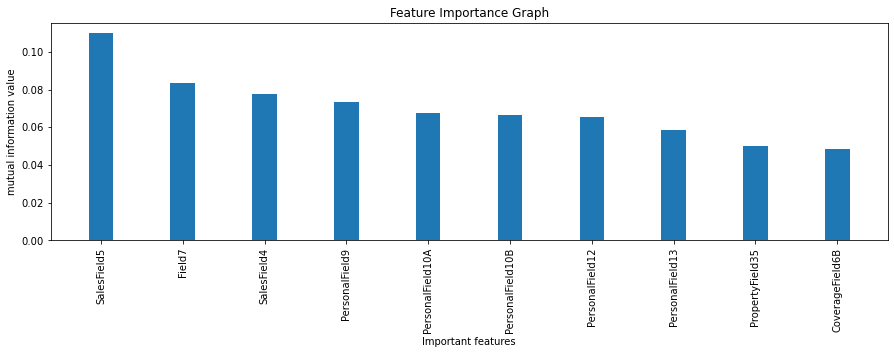

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.bar([i[0] for i in score], [i[1] for i in score],width=0.3)
plt.title("Feature Importance Graph")
plt.ylabel("mutual information value")
plt.xlabel("Important features")
plt.xticks(rotation=90)
plt.show()

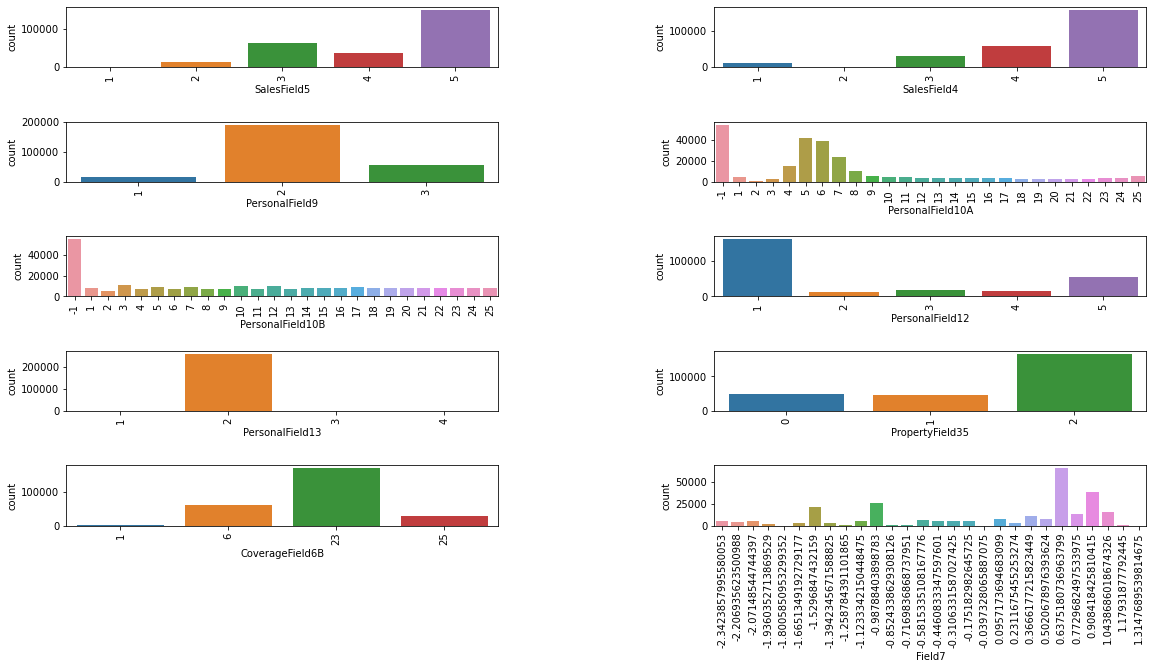

In [12]:
#https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
#here columns Field7 is kept at last to overcome the overlap
rearranged_names= ['SalesField5','SalesField4','PersonalField9','PersonalField10A','PersonalField10B','PersonalField12','PersonalField13', 
                   'PropertyField35','CoverageField6B','Field7']
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,8))
for j,i in enumerate(rearranged_names): 
  plt.subplot(5,2,j+1)
  
  plt.xlabel("Unique record value")
  plt.xticks(rotation=90)
  sns.countplot(X[i])
  plt.subplots_adjust(left=0.5,
                    bottom=0, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.9)
plt.show()

#### Observations:
* 'SalesField5' column is the most important column in the classification followed by 'SalesField4'
* We can see that 'Field7' column comes under top 10 feature.which is the standardized column

#### Box plot for top important feature based on Quote Coversion Flag

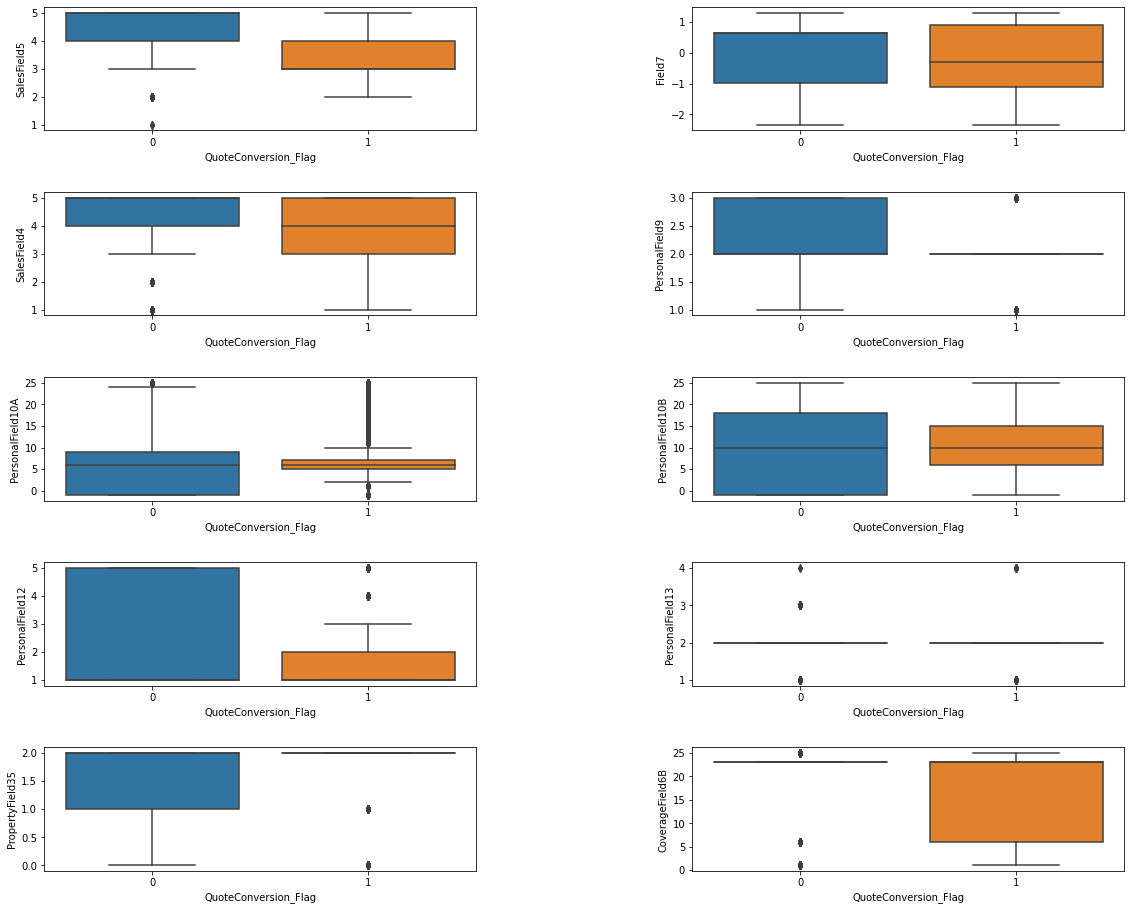

In [15]:
##using box plot
import seaborn as sns
plt.figure(figsize=(15,8))
for j,i in enumerate([i[0] for i in score]):
  plt.subplot(5,2,j+1)
  sns.boxplot(x=y_train_final, y=X[i], data=X,
                 order=[0, 1])
  plt.subplots_adjust(left=0.5,
                    bottom=0, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()

#### Observations:
* For all the important feature Quantiles are same for QuoteCoversionFlag (0 &1). So we can say individual feature contribution towards seperating the class is hard but the combination of features will help in classifying the conversion
* CoverageField6B,PersonalField13, PersonalField9 are having very low variance values. As very few values are dominating in count. So these features are not much useful in classifying the conversion

* Splitting the train data into train and cv

In [6]:
from sklearn.model_selection import train_test_split
#splitting the data to train and test
X_train,X_cv,y_train,y_cv=train_test_split(X,y_train_final,test_size=0.25,stratify=y_train_final,random_state=10) 

In [7]:
print("train input data: ",X_train.shape)
print("train label data: ",y_train.shape)
print("="*50)
print("test  input data: ",X_cv.shape)
print("test label data: ",y_cv.shape)

train input data:  (195564, 301)
train label data:  (195564,)
test  input data:  (65189, 301)
test label data:  (65189,)


#### SET_2 SMOTE data preparation

#### Note ####
* SMOTE technique is used to oversample the data. However the original paper(https://arxiv.org/abs/1106.1813) It is told to use along with Undersampling method to retain minority sample pattern

In [71]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.4) #oversampling minority classes by 40%
under = RandomUnderSampler(sampling_strategy=0.5)

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X, y_train_final)

X_train_final_smote,y_train_final_smote =under.fit_resample(X_train_smote,y_train_smote)

In [72]:
#X_train_final_smote.to_csv("X_train_smote.csv")
#y_train_final_smote.to_csv("y_train_final_smote.csv")

In [8]:
X_train_final_smote=pd.read_csv("X_train_smote.csv")
y_train_final_smote=pd.read_csv("y_train_final_smote.csv")

X_train_final_smote=X_train_final_smote.drop('Unnamed: 0',axis=1)
y_train_final_smote=y_train_final_smote.drop('Unnamed: 0',axis=1)

print(X_train_final_smote.shape,y_train_final_smote.shape)

(254229, 301) (254229, 1)


In [9]:
print("Smote combined dataset dimension is :",X_train_final_smote.shape,y_train_final_smote.shape)

Smote combined dataset dimension is : (254229, 301) (254229, 1)


In [10]:
from sklearn.model_selection import train_test_split
#splitting the data to train and test
X_train_1,X_cv_1,y_train_1,y_cv_1=train_test_split(X_train_final_smote,y_train_final_smote,test_size=0.25,stratify=y_train_final_smote,random_state=10) 

In [11]:
print("train input data: ",X_train_1.shape)
print("train label data: ",y_train_1.shape)
print("="*50)
print("test  input data: ",X_cv_1.shape)
print("test label data: ",y_cv_1.shape)

train input data:  (190671, 301)
train label data:  (190671, 1)
test  input data:  (63558, 301)
test label data:  (63558, 1)


#### SET_3 model based imputation

In [79]:
Xm=pd.read_csv("train_data_for_imputation.csv")
Xm=Xm.drop('Unnamed: 0',axis=1)
X_testm=pd.read_csv("test_data_for_imputation.csv")
X_testm=X_testm.drop('Unnamed: 0',axis=1)
print(Xm.shape, y_train_final.shape)
print(X_testm.shape)

(260753, 268) (260753,)
(173836, 268)


In [80]:
#null and non-NULL columns segreggation
train_null_columns=Xm.columns[Xm.isnull().any()] #NULL columns
non_null_col=Xm.columns.difference(train_null_columns)
#categorica features which are not null
cat_features_non_null=[i for i in Xm[non_null_col].columns if Xm.dtypes[i]=='object']
numerical_features=list(set(Xm[non_null_col].columns)-set(cat_features_non_null))

In [81]:
#https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows -->> avoiding extra column creation during concat
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from tqdm.notebook import tqdm
#since all the columns are correlated progressive prediction based model is done

def model_based_impute(X_train): 

  train_null_columns = X_train.columns[X_train.isnull().any()] #NULL columns
  non_null_col = X_train.columns.difference(train_null_columns)

  #categorical features which are not null needs to be converted to OHE
  cat_features_non_null=[i for i in X_train[non_null_col].columns if X_train.dtypes[i]=='object']
  #calling OHE train function only for categorical columns not having any NULL values
  cat_features_non_null_ohe,encoding_dict=one_conversion(X_train[cat_features_non_null])

  X_train_no_null_data_1=X_train.drop(cat_features_non_null,axis=1) #dropping the original cat. columns <> NULL in it

  X_train_no_null_data_full=pd.concat([X_train_no_null_data_1.reset_index(drop=True),cat_features_non_null_ohe.reset_index(drop=True)],axis=1) #not having original cat_features
  
  X_train_no_null_data=X_train_no_null_data_full.dropna(how='any',axis=0) #dropping all the rows which have NULL values


  X_train_final=pd.DataFrame([])

  for i in train_null_columns:
    if X_train_no_null_data[i].dtype=='O':
      enc=LabelEncoder()
      label_col=enc.fit_transform(X_train_no_null_data[i]) #training col without NULL 

      X_train_no_null_data=X_train_no_null_data.drop([i],axis=1) #removing original col

      label_col=pd.DataFrame(label_col, columns=[i]) #saved in df

      X_train_final=pd.concat([X_train_final,label_col],axis=1)
    
    else:
      continue
      #X_train_final=pd.concat([X_train_final.reset_index(drop=True),X_train_no_null_data[i].reset_index(drop=True)],axis=1)
 
  #during concatenating it is creating new column and increasing the row count. So used reset_index(which reorder the index)
  final_train=pd.concat([X_train_no_null_data.reset_index(drop=True),X_train_final.reset_index(drop=True)],axis=1)
 
  new_non_null_col=X_train_no_null_data_full.columns.difference(train_null_columns)

  return final_train,X_train_no_null_data_full,new_non_null_col



In [82]:
final_train,X_train_no_null_data_full,new_non_null_col=model_based_impute(Xm)

In [83]:
#imputing only the common column first
new_non_null_col= new_non_null_col.difference(test_null_columns.difference(train_null_columns))

In [84]:
#implementing OHE for categorical non-null features
#label encoder for NULL categorical columns
X_train_non_null_cat,encoder_dict=one_conversion(Xm[cat_features_non_null])
#implementing OHE for categorical non-null features
#test data

#test data preparation
test_null_columns=X_testm.columns[X_testm.isnull().any()] #NULL columns
non_null_col_test=X_testm.columns.difference(test_null_columns)

cat_features_non_null_test=[i for i in X_testm[non_null_col_test].columns if X_testm.dtypes[i]=='object']
numerical_features_test=list(set(X_testm[non_null_col_test].columns)-set(cat_features_non_null_test))

X_test_non_null_cat= only_transform(encoder_dict,X_testm[cat_features_non_null_test])
X_test_non_null=pd.concat([X_testm[numerical_features_test].reset_index(drop=True),X_test_non_null_cat.reset_index(drop=True),X_testm[test_null_columns].reset_index(drop=True)],axis=1)

In [85]:
null_columns=list((test_null_columns).union(set(train_null_columns)))

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from tqdm.notebook import tqdm

def model_based_impute_train_test(final_train,X_train_no_null_data_full,new_non_null_col,train_null_columns,null_columns,X_test_non_null,X_train,X_test):  #,X_test,X_test_non_null)
  

  for i in tqdm(null_columns):
      if i in train_null_columns:
          #X-train data
          y_train=final_train[i]
          test_data = X_train_no_null_data_full[X_train_no_null_data_full[i].isnull()] #test data X_train with all null rows from the NA column
          #X-test data
          y_test=X_test[i]
          test_data_1 = X_test_non_null[X_test_non_null[i].isnull()] #test data X_test with all null rows from the NA column

          Logistic_model = LogisticRegression( penalty='l2', multi_class='auto')
          Logistic_model.fit(final_train[new_non_null_col], y_train)

          predicted_val=Logistic_model.predict(test_data[new_non_null_col]) #predicting only on the non null columns of test data
          #transform/predict function on X_test
          predicted_val_test=Logistic_model.predict(test_data_1[new_non_null_col])

          X_train_no_null_data_full.loc[X_train[i].isnull(), i]=predicted_val #here updating the predicted Label encoder from LR i X_train column     
          X_test_non_null.loc[X_test[i].isnull(), i]=predicted_val_test
        
      else:
          
          test_data_1 = X_test_non_null[X_test_non_null[i].isnull()] #test data X_test with all null rows from the NA column

          Logistic_model = LogisticRegression( penalty='l2', multi_class='auto')
          Logistic_model.fit(final_train[new_non_null_col], y_train)

          predicted_val_test=Logistic_model.predict(test_data_1[new_non_null_col])

          X_test_non_null.loc[X_test[i].isnull(), i]=predicted_val_test
        

  return X_train_no_null_data_full,X_test_non_null

In [87]:
train_imputed,test_imputed=model_based_impute_train_test(final_train,X_train_no_null_data_full,new_non_null_col,train_null_columns,null_columns,X_test_non_null,Xm,X_testm)

  0%|          | 0/11 [00:00<?, ?it/s]

In [88]:
print("train having any null column count is :",len(train_imputed.columns[train_imputed.isnull().any()]))
print("\n test having any null column count is :",len(test_imputed.columns[test_imputed.isnull().any()]))

train having any null column count is : 0

 test having any null column count is : 0


In [89]:
print("Dimension of the Model based imputation for train data :",train_imputed.shape)
print("Dimension of the Model based imputation for the test data :",test_imputed.shape)

Dimension of the Model based imputation for train data : (260753, 301)
Dimension of the Model based imputation for the test data : (173836, 301)


In [90]:
#train_imputed.to_csv("LR_train_set_3.csv")
#test_imputed.to_csv("LR_test_set_3.csv")

In [12]:
train_imputed=pd.read_csv("LR_train_set_3.csv")
test_imputed=pd.read_csv("LR_test_set_3.csv")
train_imputed=train_imputed.drop('Unnamed: 0',axis=1)
test_imputed=test_imputed.drop('Unnamed: 0',axis=1)
print(train_imputed.shape,test_imputed.shape)

(260753, 301) (173836, 301)


In [13]:
from sklearn.model_selection import train_test_split
#splitting the data to train and test
X_train_2,X_cv_2,y_train_2,y_cv_2=train_test_split(train_imputed,y_train_final,test_size=0.25,stratify=y_train_final,random_state=10) 

#### Response Encoding for Categorical features - SET_4

* This method can be tried in any of the above imputation method for categorical features. Currently I will consider Mode set

In [192]:
train_set4=pd.read_csv("mode_imputed_with_catg_train.csv")
test_set4=pd.read_csv("mode_imputed_with_catg_test.csv")
train_set4=train_set4.drop('Unnamed: 0',axis=1)
test_set4=test_set4.drop('Unnamed: 0',axis=1)
print(train_set4.shape,test_set4.shape)

(260753, 268) (173836, 268)


In [196]:
cat_features_train=[i for i in train_set4.columns if train_set4.dtypes[i]=='object']
numerical_features_train=list(set(train_set4.columns)-set(cat_features_train))

#test set
cat_features_test=[i for i in test_set4.columns if test_set4.dtypes[i]=='object']
numerical_features_test=list(set(test_set4.columns)-set(cat_features_test))

In [197]:
#https://stackoverflow.com/questions/46379095/convert-two-numpy-array-to-dataframe -->> arrays to DF
#https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ -->> extracting data from groupby pandas
#https://pandas.pydata.org/docs/user_guide/groupby.html  ->> to get key features from group
#https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array -->>adding new column to numpy array

def train_cat_resp(X_train_tp,y_train): 
  cat_variable=X_train_tp
  project_app_status=y_train
  #creating dataframe so that it helps in grouping similar distict categories in a feature
  dataset = pd.DataFrame({'cat_variable':cat_variable, 'project_app_status': project_app_status}, columns=['cat_variable', 'project_app_status'])


  d=dataset.groupby(by=[dataset.columns[0]]) # group by categorical variable which gets distinct features

  features_list=list(d.groups.keys())# getting distinct categories and converting dictionary to list of keys
  feat_0_1_list = [] #storing 0 1 label prob. values
  for i in features_list: #for each key/distinct values form the ditionary
    
    count_label=d.get_group(i).value_counts().to_dict()  #getting dataframe of category,label and count

    c=np.zeros(2) #creating dummy list of 2 values so if only one type of category present for other will be default counted as zero
    for k in range(len(count_label)):
      a=int(list(count_label)[k][1])  #count label for category (0/1) & type casting to integer as it is used as index
      count_1=count_label[(i, a)]  #count value for corresonding label(a)
      
      c[a]=count_1 #updating label with count value
 

    #probability calculation
    resp_0_val=c[0]/(c.sum())
    resp_1_val=c[1]/(c.sum())

    feat_0_1_list.append([resp_0_val,resp_1_val]) # storing 0 label probbilities of all catergories of cat_variable

  respo_storing=dict(zip(features_list,feat_0_1_list)) #converting to dictionary of keys as distict category and values a probabilities 

  return respo_storing

In [198]:
def repl_prob(respo_storing,dataset):  
  
  dataset=pd.DataFrame(dataset) #input categorical variable into dataframe
  name=[str(dataset.columns[0] +"_0"),str(dataset.columns[0] +"_1")] #creating new feature names for two columns(since target is binary)

  #newly two columns are added because of binary classification
  dataset[name[0]]=np.full((len(dataset),),0.5).reshape(-1,1) #initializing values to 0.5 so that new features(in case present test data) are auto assigned with 0.5 probability
  dataset[name[1]]=np.full((len(dataset),),0.5).reshape(-1,1)

  #transforming data to probability
  d1=dataset.groupby(by=[dataset.columns[0]]) # group by categorical variable distinct features
  features_1=list(d1.groups.keys())# dictionary to list of keys
  l=list(set(features_1) & set(respo_storing.keys())) # selecting only features in common to train and input data so rest will be 0.5

  for j,i in enumerate(l):

    dataset[name[0]][dataset[dataset.columns[0]]==i]=respo_storing[i][0] #assigning prob to test keys and storing in cat_name_0 th column
    dataset[name[1]][dataset[dataset.columns[0]]==i]=respo_storing[i][1] ##assigning prob  to test keys and storing in cat_name_1 th column

  return dataset[[name[0],name[1]]] #returning only resulting cat_name_0,cat_name_1 columns

In [199]:
df_respo=pd.DataFrame([])
for i in cat_features_train:
  respo_prob_dict= train_cat_resp(train_set4[i],y_train_final)  #fit function
  response_df=repl_prob(respo_prob_dict,train_set4[i])  #transform function
  df_respo[response_df.columns[0]] = response_df[response_df.columns[0]]
  df_respo[response_df.columns[1]]= response_df[response_df.columns[1]]

In [200]:
df_respo_test=pd.DataFrame([])
for i in cat_features_test:
  respo_prob_dict= train_cat_resp(train_set4[i],y_train_final)  #fit function
  response_df=repl_prob(respo_prob_dict,test_set4[i])  #transform function
  df_respo_test[response_df.columns[0]] = response_df[response_df.columns[0]]
  df_respo_test[response_df.columns[1]]= response_df[response_df.columns[1]]

In [201]:
X_train_set= pd.concat([train_set4,df_respo],axis=1)
X_train_set_4_final= X_train_set.drop(cat_features_train,axis=1)
print("X_train set2 dimension", X_train_set_4_final.shape)

X_test_set4= pd.concat([test_set4,df_respo_test],axis=1) 
X_test_set4_final= X_test_set4.drop(cat_features_test,axis=1)
print("\n X_test set2 dimension", X_test_set4_final.shape)

X_train set2 dimension (260753, 276)

 X_test set2 dimension (173836, 276)


In [ ]:
#X_train_set_4_final.to_csv('response_train_set4.csv')
#X_test_set4_final.to_csv('response_test_set4.csv')

In [14]:
response_train_set4=pd.read_csv('response_train_set4.csv')
presponse_test_set4=pd.read_csv('response_test_set4.csv')
response_train_set4=response_train_set4.drop('Unnamed: 0',axis=1)
presponse_test_set4=presponse_test_set4.drop('Unnamed: 0',axis=1)
print(response_train_set4.shape,presponse_test_set4.shape)

(260753, 276) (173836, 276)


In [15]:
from sklearn.model_selection import train_test_split
#splitting the data to train and test
X_train_3,X_cv_3,y_train_3,y_cv_3=train_test_split(response_train_set4,y_train_final,test_size=0.25,stratify=y_train_final,random_state=10) 

#### Capturing NaN values by 0 &1 in new column -SET_5

In [8]:
Xm=pd.read_csv("train_data_for_imputation.csv")
Xm=Xm.drop('Unnamed: 0',axis=1)
X_testm=pd.read_csv("test_data_for_imputation.csv")
X_testm=X_testm.drop('Unnamed: 0',axis=1)
print(Xm.shape, y_train_final.shape)
print(X_testm.shape)

(260753, 268) (260753,)
(173836, 268)


In [17]:
train_null=dict(Xm[Xm.columns[Xm.isnull().any()]].apply(lambda x: x.isna().sum()))
test_null=dict(X_testm[X_testm.columns[X_testm.isnull().any()]].apply(lambda x: x.isna().sum()))

#storing the columns having NULL values in seperate dataframe
df_train=Xm[train_null.keys()]
df_test=X_testm[train_null.keys()] #using the same train NULL keys

In [18]:
def capture_nan(df_2):
  """ Here new column is added which capture the presence or absence of value in the column"""
  df_new=pd.DataFrame([])
  for i,j in df_2.items():
    df_new[i+'_NAN']=np.where(df_2[i].isnull(),1,0)
  return df_new

In [19]:
nan_result=capture_nan(df_train)
nan_result_test=capture_nan(df_test)

In [20]:
#Model-SET-2 NAN new column addition method
X_train_set5=pd.concat([Xm,nan_result],axis=1)
X_test_set5 =pd.concat([X_testm,nan_result_test],axis=1)
print("Dimension of train: ",X_train_set5.shape)
print("Dimension of test: ",X_test_set5.shape)

Dimension of train:  (260753, 277)
Dimension of test:  (173836, 277)


In [24]:
cat_features=[i for i in X_train_set5.columns if X_train_set5.dtypes[i]=='object']
numerical_features=list(set(X_train_set5.columns)-set(cat_features))

train_data_cat_1,encoded_dict_1=one_conversion(X_train_set5[cat_features])
test_data_cat_1 =only_transform(encoded_dict_1,X_test_set5[cat_features])

In [25]:
X_train_set5= pd.concat([X_train_set5[numerical_features].reset_index(drop=True),train_data_cat_1.reset_index(drop=True)],axis=1)
X_test_set5=pd.concat([X_test_set5[numerical_features].reset_index(drop=True),test_data_cat_1.reset_index(drop=True)],axis=1)
print("Dimension of train data after OHE:",X_train_set5.shape)
print("Dimension of test data after OHE:",X_test_set5.shape)

Dimension of train data after OHE: (260753, 310)
Dimension of test data after OHE: (173836, 310)


In [26]:
#fill the null values by constant -99 value
X_train_set5=X_train_set5.fillna(-99)
X_test_set5=X_test_set5.fillna(-99)

In [29]:
#X_train_set5.to_csv("train_set5.csv")
#X_test_set5.to_csv("test_set5.csv")

In [18]:
train_set5=pd.read_csv("train_set5.csv")
test_set5=pd.read_csv("test_set5.csv")
train_set5=train_set5.drop('Unnamed: 0', axis=1)
test_set5=test_set5.drop('Unnamed: 0', axis=1)
print(train_set5.shape,test_set5.shape)

(260753, 310) (173836, 310)


In [19]:
from sklearn.model_selection import train_test_split
#splitting the data to train and test
X_train_4,X_cv_4,y_train_4,y_cv_4=train_test_split(train_set5,y_train_final,test_size=0.25,stratify=y_train_final,random_state=10) 

### Model Training

In [20]:
sample_data=pd.read_csv("sample_submission.csv")

### Logistic Regression model on different sets

* https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model
*https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
* https://www.kaggle.com/code/ariadneadler/xgboost-gridsearchcv-stratified-k-fold-top-5/notebook
* https://stackoverflow.com/questions/51671058/different-roc-auc-with-xgboost-gridsearch-scoring-roc-auc-and-roc-auc-score


In [21]:
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [22]:
def logistic_model(X_train,X_test,y_train,y_test):


    prams={
        'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter' : [200,500,1000]
    }

    logisticR=LogisticRegression(solver='liblinear')  
    
    skf=StratifiedKFold(n_splits=2, shuffle=False)
    random_cfl1=GridSearchCV(logisticR,param_grid=prams,verbose=10,n_jobs=-1,cv=skf)
    random_cfl1.fit(X_train,y_train)
    predict_prob_val_train=random_cfl1.predict_proba(X_train)
    predict_prob_val_test=random_cfl1.predict_proba(X_test)
    
    best_param=random_cfl1.best_params_
    roc_train=roc_auc_score(y_train, predict_prob_val_train[:,1])
    roc_test=roc_auc_score(y_test, predict_prob_val_test[:,1])


    return best_param,roc_train, roc_test,predict_prob_val_train,predict_prob_val_test

#### 1st set  (Mode)

In [12]:
best_param_1,roc_train_1, roc_test_1,predict_prob_val_train_1,predict_prob_val_test_1=logistic_model(X_train,X_cv,y_train,y_cv)
  

Fitting 2 folds for each of 21 candidates, totalling 42 fits


In [18]:
print("Best parameter of the set_1 model is:",best_param_1)
print("\nroc auc score value of set_1 train data is: ",roc_train_1)
print("roc auc score value for set_1 test data is : ",roc_test_1)

Best parameter of the set_1 model is: {'C': 1, 'max_iter': 200}

roc auc score value of set_1 train data is:  0.9424714582392345
roc auc score value for set_1 test data is :  0.9432742400518371


In [42]:
logisticR=LogisticRegression(solver='liblinear', C=1,max_iter=200)  

logisticR.fit(X ,y_train_final)
predict_prob_val_train1=logisticR.predict_proba(X)
predict_prob_val_test1=logisticR.predict_proba(X_test)

In [43]:
print("roc_auc of mode imputed train data is :",roc_auc_score(y_train_final, predict_prob_val_train1[:,1]))

roc_auc of mode imputed train data is : 0.9426599158637747


In [44]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test1[:,1]
sample_data.to_csv("LR_mode_imputation.csv",index=False)

#### 2nd set  (Smote Based)

In [80]:
best_param_2,roc_train_2, roc_test_2,predict_prob_val_train_2,predict_prob_val_test_2=logistic_model(X_train_1,X_cv_1,y_train_1,y_cv_1)

Fitting 2 folds for each of 21 candidates, totalling 42 fits


In [82]:
print("Best parameter of the model is for set_2:",best_param_2)
print("\n roc auc score value of set_2 train data is: ",roc_train_2)
print("roc auc score value for set_2 test data is : ",roc_test_2)

Best parameter of the model is for set_2: {'C': 10, 'max_iter': 200}

 roc auc score value of set_2 train data is:  0.9555019118938778
roc auc score value for set_2 test data is :  0.9554546270859987
[CV 1/2; 3/21] START C=0.001, max_iter=1000.....................................
[CV 1/2; 3/21] END ......C=0.001, max_iter=1000;, score=0.872 total time=  41.1s
[CV 1/2; 7/21] START C=0.1, max_iter=200........................................
[CV 1/2; 7/21] END .........C=0.1, max_iter=200;, score=0.894 total time= 1.5min
[CV 2/2; 11/21] START C=1, max_iter=500.........................................
[CV 2/2; 11/21] END ..........C=1, max_iter=500;, score=0.894 total time= 1.4min
[CV 2/2; 14/21] START C=10, max_iter=500........................................
[CV 2/2; 14/21] END .........C=10, max_iter=500;, score=0.894 total time= 1.7min
[CV 2/2; 18/21] START C=100, max_iter=1000......................................
[CV 2/2; 18/21] END .......C=100, max_iter=1000;, score=0.894 total tim

In [ ]:
logisticR=LogisticRegression(solver='liblinear', C=10,max_iter=200)  

logisticR.fit(X_train_final_smote ,y_train_final_smote)
predict_prob_val_train2=logisticR.predict_proba(X_train_final_smote)
predict_prob_val_test2=logisticR.predict_proba(X_test)

In [85]:
print("roc_auc of smote imputed train data is :",roc_auc_score(y_train_final_smote, predict_prob_val_train2[:,1]))

roc_auc of smote imputed train data is : 0.9555837833412977


In [86]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test2[:,1]
sample_data.to_csv("LR_model_smote.csv",index=False)

#### 3rd set  (LR imputation)

In [10]:
best_param_3,roc_train_3, roc_test_3,predict_prob_val_train_3,predict_prob_val_test_3=logistic_model(X_train_2,X_cv_2,y_train_2,y_cv_2)


Fitting 2 folds for each of 21 candidates, totalling 42 fits


In [12]:
print("Best parameter of the model is for set_3:",best_param_3)
print("\n roc auc score value of set_3 train data is: ",roc_train_3)
print("roc auc score value for set_3 test data is : ",roc_test_3)

Best parameter of the model is for set_3: {'C': 1000, 'max_iter': 200}

 roc auc score value of set_3 train data is:  0.9425664462111939
roc auc score value for set_3 test data is :  0.9433716924715174


In [23]:
logisticR=LogisticRegression(solver='liblinear', C=1000,max_iter=200)  

logisticR.fit(train_imputed,y_train_final)
predict_prob_val_train3=logisticR.predict_proba(train_imputed)
predict_prob_val_test3=logisticR.predict_proba(test_imputed)

print("roc_auc of LR imputed train data is :",roc_auc_score(y_train_final, predict_prob_val_train3[:,1]))

roc_auc of LR imputed train data is : 0.9427630691372246


In [26]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test3[:,1]
sample_data.to_csv("LR_model_imputation.csv",index=False)

#### 4th set (Response Encoding)

In [16]:
best_param_4,roc_train_4, roc_test_4,predict_prob_val_train_4,predict_prob_val_test_4=logistic_model(X_train_3,X_cv_3,y_train_3,y_cv_3)


Fitting 2 folds for each of 21 candidates, totalling 42 fits


In [21]:
print("Best parameter of the model is for set_4:",best_param_4)
print("\n roc auc score value of set_4 train data is: ",roc_train_4)
print("roc auc score value for set_4 test data is : ",roc_test_4)

Best parameter of the model is for set_4: {'C': 1, 'max_iter': 200}

 roc auc score value of set_4 train data is:  0.9421755822080591
roc auc score value for set_4 test data is :  0.9429443428758396


In [19]:
logisticR=LogisticRegression(solver='liblinear', C=1,max_iter=200)  

logisticR.fit(response_train_set4,y_train_final)
predict_prob_val_train4=logisticR.predict_proba(response_train_set4)
predict_prob_val_test4=logisticR.predict_proba(presponse_test_set4)

In [20]:
print("roc_auc of Response encoded train data is :",roc_auc_score(y_train_final, predict_prob_val_train4[:,1]))

roc_auc of Response encoded train data is : 0.9424216811686532


In [27]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test4[:,1]
sample_data.to_csv("LR_model_response_encoded.csv",index=False)

#### 5th set (NaN capture & Constant)

In [30]:
best_param_5,roc_train_5, roc_test_5,predict_prob_val_train_5,predict_prob_val_test_5=logistic_model(X_train_4,X_cv_4,y_train_4,y_cv_4)

Fitting 2 folds for each of 21 candidates, totalling 42 fits


In [31]:
print("Best parameter of the model is for set_5:",best_param_5)
print("\n roc auc score value of set_5 train data is: ",roc_train_5)
print("roc auc score value for set_5 test data is : ",roc_test_5)

Best parameter of the model is for set_5: {'C': 10, 'max_iter': 200}

 roc auc score value of set_5 train data is:  0.9431178778007091
roc auc score value for set_5 test data is :  0.9437237506320236


In [ ]:
logisticR=LogisticRegression(solver='liblinear', C=10,max_iter=200)  

logisticR.fit(train_set5,y_train_final)
predict_prob_val_train5=logisticR.predict_proba(train_set5)
predict_prob_val_test5=logisticR.predict_proba(test_set5)

In [33]:
print("roc_auc of NaN captured train data is :",roc_auc_score(y_train_final, predict_prob_val_train5[:,1]))

roc_auc of NaN captured train data is : 0.943357532947038


In [34]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test5[:,1]
sample_data.to_csv("LR_model_NaN_captured.csv",index=False)

#### Observations:
* SET_1, SET_2 & SET_5 are performing well for test data as well as in the Kaggle score So in further algorithms only these sets are considered

#### set-2 (Logistic Regression) Analysis

In [ ]:
#reference AAIC GBDT assignment
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns

def draw_roc_plot(y_train,y_test,predict_prob_val_train,predict_prob_val_test):
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, predict_prob_val_train)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predict_prob_val_test)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ERROR PLOT")
    plt.grid()
    plt.show()
    
    return train_fpr, train_tpr, tr_thresholds


def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))] #getting max product value index

    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
    

def heatmap_test(test_conf):
    sns.heatmap(test_conf, annot=True,fmt="d",cmap='Blues')
    plt.xlabel("Predicted approved projects")
    plt.ylabel("Actual approved projects")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    
#the function comprise of all above functions    
def sequence_fun(y_train,y_test,predict_prob_val_train,predict_prob_val_test):
    train_fpr, train_tpr, tr_thresholds=draw_roc_plot(y_train,y_test,predict_prob_val_train,predict_prob_val_test)
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    print("Test confusion matrix")
    test_conf=confusion_matrix(y_test, predict_with_best_t(predict_prob_val_test, best_t))
    print(test_conf,"\n")
    heatmap_test(test_conf)

In [ ]:
#SET-1 Analysis from Logistoic Regression
sequence_fun(y_train,y_cv_1,predict_prob_val_train_2[:,1],predict_prob_val_test_2[:,1])

In [90]:
#HERE ONLY the best perofrming set SET_1 & SET_5 results are shown in the table
#https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/  -->> to showcase result in one table
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["SET", "Model", "Train_auc", "cv_auc","Full_train_auc"])
  
# Add rows
myTable.add_row(["  SET_1(Mode)", "LR", "94.24 %", "94.32 %", "94.36 %"])
myTable.add_row(["   SET_2(Smote)", "LR", "95.55 %", "95.55 %", "95.55 %"])
myTable.add_row(["SET_3(LR)", "LR", " 94.25 % ", "94.33 %", "94.27 %"])
myTable.add_row(["     SET_4(Resp Enc)", "LR", "94.21 %", "94.29 %", "94.24 %"])
myTable.add_row(["         SET_5(NaN capture)", "LR", "94.31 %", "94.37 %", "94.33 %"])

  
print(myTable)

+-----------------------------+-------+-----------+---------+----------------+
|             SET             | Model | Train_auc |  cv_auc | Full_train_auc |
+-----------------------------+-------+-----------+---------+----------------+
|          SET_1(Mode)        |   LR  |  94.24 %  | 94.32 % |    94.36 %     |
|          SET_2(Smote)       |   LR  |  95.55 %  | 95.55 % |    95.55 %     |
|          SET_3(LR)          |   LR  |  94.25 %  | 94.33 % |    94.27 %     |
|          SET_4(Resp Enc)    |   LR  |  94.21 %  | 94.29 % |    94.24 %     |
|          SET_5(NaN capture) |   LR  |  94.31 %  | 94.37 % |    94.33 %     |
+-----------------------------+-------+-----------+---------+----------------+


#### Observation :
* LR model is performing well for SET_1, SET_2 & SET_5 dataset
* In kaggle LR with Capture NaN(SET_4) scored the highest AUC among other as 0.94296
* Only 3 sets are considered for the further Ensembles models 

### Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import time
from tqdm.notebook import tqdm
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV


In [21]:
def randomforest_model(X_train,X_test,y_train,y_test):
    params = {
         'criterion' :['gini', 'entropy'],
         'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70],
         'max_features': ['auto', 'log2'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000],
         'class_weight' : ['balanced']
    }


    rf = RandomForestClassifier()
    skf=StratifiedKFold(n_splits=2, shuffle=False)
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,cv = skf, verbose=2,n_jobs = -1)
    rf_random.fit(X_train,y_train)
    predict_prob_val_train=rf_random.predict_proba(X_train)
    predict_prob_val_test=rf_random.predict_proba(X_test)
    best_param=rf_random.best_params_zz
    roc_train=roc_auc_score(y_train, predict_prob_val_train[:,1])
    roc_test=roc_auc_score(y_test, predict_prob_val_test[:,1])
    
    return best_param,roc_train, roc_test,predict_prob_val_train,predict_prob_val_test
    

#### SET_1


In [ ]:
best_param_1,roc_train_1, roc_test_1,predict_prob_val_train_1,predict_prob_val_test_1=randomforest_model(X_train,X_cv,y_train,y_cv)

In [75]:
print("the best parametrs are: ",best_param_1)
print("train data roc auc score is : ",roc_train_1)
print("test data roc_auc score is: ", roc_test_1)

the best parametrs are:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
train data roc auc score is :  1.0
test data roc_auc score is:  0.9567230238048637


In [77]:
rf = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, 
                            max_features= 'auto', max_depth= 70, criterion= 'gini', 
                             class_weight='balanced', bootstrap= False)
rf.fit(X,y_train_final)
predict_prob_val_train1r=rf.predict_proba(X)
predict_prob_val_test1r=rf.predict_proba(X_test)  

In [79]:
print(" RF roc_auc of mode based train data is :",roc_auc_score(y_train_final, predict_prob_val_train1r[:,1]))

 RF roc_auc of mode based train data is : 0.9999999998069244


In [80]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test1r[:,1]
sample_data.to_csv("RF_mode_imputed.csv",index=False)

#### Set_2

In [ ]:
best_param_2,roc_train_2,roc_test_2,predict_prob_val_train_2,predict_prob_val_test_2=randomforest_model(X_train_1,X_cv_1,y_train_1,y_cv_1)

In [91]:
print("the best parametrs are: ",best_param_2)
print("train data roc auc score is : ",roc_train_2)
print("test data roc_auc score is: ", roc_test_2)

the best parametrs are:  {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
train data roc auc score is :  1.0
test data roc_auc score is:  0.9758861193413172


In [ ]:
rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, 
                            max_features= 'auto', max_depth= 30, criterion= 'gini', 
                             class_weight='balanced', bootstrap= False)
rf.fit(X_train_final_smote ,y_train_final_smote)
predict_prob_val_train2r=rf.predict_proba(X_train_final_smote)
predict_prob_val_test2r=rf.predict_proba(X_test) 

In [26]:
print(" RF roc_auc of smote based train data is :",roc_auc_score(y_train_final_smote, predict_prob_val_train2r[:,1]))

 RF roc_auc of smote based train data is : 1.0


In [27]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test2r[:,1]
sample_data.to_csv("RF_smote_imputed.csv",index=False)

#### Set_5

In [ ]:
best_param_5,roc_train_5, roc_test_5,predict_prob_val_train_5,predict_prob_val_test_5=randomforest_model(X_train_4,X_cv_4,y_train_4,y_cv_4)

In [28]:
print("the best parametrs are: ",best_param_5)
print("train data roc auc score is : ",roc_train_5)
print("test data roc_auc score is: ", roc_test_5)

the best parametrs are:  {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
train data roc auc score is :  1.0
test data roc_auc score is:  0.958713565352107


In [29]:
rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 2, 
                            max_features= 'auto', max_depth= 40, criterion= 'gini', 
                             class_weight='balanced', bootstrap= False)
rf.fit(train_set5 ,y_train_final)
predict_prob_val_train5r=rf.predict_proba(train_set5)
predict_prob_val_test5r=rf.predict_proba(test_set5) 

In [31]:
print(" RF roc_auc of NaN based train data is :",roc_auc_score(y_train_final, predict_prob_val_train5r[:,1]))

 RF roc_auc of NaN based train data is : 0.9999999987450083


In [32]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test2r[:,1]
sample_data.to_csv("RF_NaN_imputed.csv",index=False)

In [41]:
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["SET", "Model", "Train_auc", "cv_auc","Full_train_auc"])
  
# Add rows
myTable.add_row(["  SET_1(Mode)", "RF", "100 %", " 95.67%", " 99.99 %"])
myTable.add_row(["   SET_2(Smote)", "RF", "100 %", " 97.61 %", " 99.99 %"])
myTable.add_row(["         SET_5(NaN capture)", "RF", "100 %", " 95.87 %", "99.99%"])

  
print(myTable)

+-----------------------------+-------+-----------+----------+----------------+
|             SET             | Model | Train_auc |  cv_auc  | Full_train_auc |
+-----------------------------+-------+-----------+----------+----------------+
|          SET_1(Mode)        |   RF  |   100 %   |  95.67%  |     99.99 %    |
|          SET_2(Smote)       |   RF  |   100 %   |  97.61 % |     99.99 %    |
|          SET_5(NaN capture) |   RF  |   100 %   |  95.87 % |     99.99%     |
+-----------------------------+-------+-----------+----------+----------------+


### XGBoost Algorithm

* Here I will be choosing SET_1, SET_4 & SET_5 which are better performing datset are exposed to XGBClassifier

In [6]:
!pip install xgboost

* https://stackoverflow.com/questions/51671058/different-roc-auc-with-xgboost-gridsearch-scoring-roc-auc-and-roc-auc-score

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time
from datetime import datetime

In [43]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


* https://ayguno.github.io/curious/portfolio/bayesian_optimization.html

#### Set-1

In [44]:
#https://github.com/fmfn/BayesianOptimization

from bayes_opt import BayesianOptimization
# Gradient Boosting Machine
roc_train_test=[]
def gbm_cl_bo(max_depth, reg_alpha, gamma,colsample_bytree,min_child_weight,learning_rate, n_estimators, subsample):
    #print(max_depth, reg_alpha, gamma,colsample_bytree,min_child_weight,learning_rate, n_estimators, subsample)

    
    x_cfl=XGBClassifier(max_depth=int(max_depth),
                        reg_alpha=reg_alpha,
                        gamma= gamma,
                        colsample_bytree=colsample_bytree,
                        min_child_weight=min_child_weight,
                        learning_rate =learning_rate,
                        n_estimators=int(n_estimators), #need whole number
                        subsample=subsample,
                        n_jobs=-1,eval_metric='auc')
    
    x_cfl.fit(X_train,y_train)

    predict_y_train1 = x_cfl.predict_proba(X_train)
    predict_y_test1 = x_cfl.predict_proba(X_cv)
    roc_train_1= roc_auc_score(y_train, predict_y_train1[:,1])
    roc_test_1= roc_auc_score(y_cv, predict_y_test1[:,1])
    roc_train_test.append((roc_train_1,roc_test_1))
    return roc_test_1
# Run Bayesian Optimization
start = time.time()
params_gbm ={
    'max_depth':(3, 10), #range of values are given not list
    'min_child_weight':(1,7),
    'reg_alpha': (0,1),
    'gamma' : (0.3,0.7),
    'colsample_bytree':(0.1,1),
    'learning_rate':(0.01, 1),
    'n_estimators':(100, 1000),
    'subsample': (0.8, 1)
}
gbm_bo_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=0)
gbm_bo_1.maximize(init_points=7, n_iter=4)
print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9576   |  0.5939   |  0.5861   |  0.6067   |  6.814    |  3.542    |  681.3    |  0.4376   |  0.9784   |
|  2        |  0.9518   |  0.9673   |  0.4534   |  0.7938   |  6.702    |  4.408    |  933.0    |  0.07104  |  0.8174   |
|  3        |  0.9524   |  0.1182   |  0.633    |  0.7804   |  9.09     |  6.872    |  819.2    |  0.4615   |  0.9561   |
|  4        |  0.9634   |  0.2064   |  0.556    |  0.1519   |  9.613    |  4.131    |  473.2    |  0.2646   |  0.9548   |
|  5        |  0.9665   |  0.5105   |  0.5274   |  0.0286   |  7.323    |  4.673    |  655.2    |  0.9437   |  0.9364   |
|  6        |  0.9598   |  0.4236   |  0.4748   |  0.7007   |  3.422    |  5.001    |  703.6    |  0.2104   |  0.8258   |
|  7        |  0.958    

In [45]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_1.max)
print("\n test_data roc_auc score is : ",gbm_bo_1.max['target'])

the best parameters are:  {'target': 0.966459422539235, 'params': {'colsample_bytree': 0.5105352989948937, 'gamma': 0.5273735795474593, 'learning_rate': 0.028601902431991594, 'max_depth': 7.323448479531139, 'min_child_weight': 4.672574336334528, 'n_estimators': 655.2405971872812, 'reg_alpha': 0.9437480785146242, 'subsample': 0.9363640598206967}}

 test_data roc_auc score is :  0.966459422539235


In [ ]:
now =datetime.now()
prams={
    'learning_rate':[0.0286], 
    'min_child_weight' : [4],
     'max_depth':[7], 
    'gamma' : [0.5274],
    'colsample_bytree':[0.5105],
    'subsample': [0.9364]
  
}

i=883

skf=StratifiedKFold(n_splits=4, shuffle = False)
x_cfl=XGBClassifier(n_estimators=i,n_jobs=-1,eval_metric='auc')
random_cfl1=GridSearchCV(x_cfl,param_grid=prams,verbose=10,scoring='roc_auc',n_jobs=-1,cv =skf)
random_cfl1.fit(X,y_train_final)
predict_y_train1 = random_cfl1.predict_proba(X)


In [78]:
predict_y_test1 = random_cfl1.predict_proba(X_test)
print("roc train score is: ",roc_auc_score(y_train_final, predict_y_train1[:,1]))

roc train score is:  0.9821973538729776


In [79]:
sample_data['QuoteConversion_Flag']=predict_y_test1[:,1]
sample_data.to_csv("XGB_mode_imputed.csv",index=False)

#### set_2

In [93]:
#https://github.com/fmfn/BayesianOptimization

from bayes_opt import BayesianOptimization
# Gradient Boosting Machine
roc_train_test=[]
def gbm_cl_bo(max_depth,gamma,colsample_bytree,min_child_weight,learning_rate, n_estimators, subsample): #reg_alpha,
    #print(max_depth, reg_alpha, gamma,colsample_bytree,min_child_weight,learning_rate, n_estimators, subsample)

    
    x_cfl=XGBClassifier(max_depth=int(max_depth),
                        #reg_alpha=reg_alpha,
                        gamma= gamma,
                        colsample_bytree=colsample_bytree,
                        min_child_weight=min_child_weight,
                        learning_rate =learning_rate,
                        n_estimators=int(n_estimators), #need whole number
                        subsample=subsample,
                        n_jobs=-1,eval_metric='auc')
    
    x_cfl.fit(X_train_1,y_train_1)

    predict_y_train2 = x_cfl.predict_proba(X_train_1)
    predict_y_test2 = x_cfl.predict_proba(X_cv_1)
    roc_train_2= roc_auc_score(y_train_1, predict_y_train2[:,1])
    roc_test_2= roc_auc_score(y_cv_1, predict_y_test2[:,1])
    roc_train_test.append((roc_train_2,roc_test_2))
    return roc_test_2
# Run Bayesian Optimization
start = time.time()
params_gbm ={
    'max_depth':(3, 10), #range of values are given not list
    'min_child_weight':(1,7),
    #'reg_alpha': (0,1),
    'gamma' : (0.1,0.7),
    'colsample_bytree':(0.1,1),
    'learning_rate':(0.01, 1),
    'n_estimators':(100, 1000),
    'subsample': (0.1, 1)
}
gbm_bo_2 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=0)
gbm_bo_2.maximize(init_points=10, n_iter=4)
print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.9681   |  0.5939   |  0.5291   |  0.6067   |  6.814    |  3.542    |  681.3    |  0.4938   |
|  2        |  0.9774   |  0.9026   |  0.6782   |  0.3896   |  8.542    |  4.173    |  611.2    |  0.933    |
|  3        |  0.9806   |  0.1639   |  0.1523   |  0.03002  |  8.828    |  5.669    |  883.0    |  0.9808   |
|  4        |  0.9791   |  0.8192   |  0.3769   |  0.7827   |  3.828    |  4.84     |  229.0    |  0.9502   |
|  5        |  0.9541   |  0.5697   |  0.3488   |  0.2719   |  8.42     |  3.737    |  611.6    |  0.1169   |
|  6        |  0.9683   |  0.6559   |  0.4673   |  0.6208   |  9.606    |  5.091    |  423.6    |  0.4933   |
|  7        |  0.963    |  0.7279   |  0.1361   |  0.6701   |  7.694    |  2.262    |  216.0    |  0.3839   |
|  8      

In [94]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_2.max)
print("\n test_data roc_auc score is : ",gbm_bo_2.max['target'])

the best parameters are:  {'target': 0.980601400728903, 'params': {'colsample_bytree': 0.16393245237809825, 'gamma': 0.15227757982092444, 'learning_rate': 0.03001621346592246, 'max_depth': 8.828338918835566, 'min_child_weight': 5.668940505699103, 'n_estimators': 883.0109334221372, 'subsample': 0.9807565080094875}}

 test_data roc_auc score is :  0.980601400728903


In [92]:
now =datetime.now()
prams={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}

i=883

skf=StratifiedKFold(n_splits=4, shuffle = False)
x_cfl=XGBClassifier(n_estimators=i,n_jobs=-1,eval_metric='auc')
random_cfl1=GridSearchCV(x_cfl,param_grid=prams,verbose=10,scoring='roc_auc',n_jobs=-1,cv =skf)
random_cfl1.fit(X_train_final_smote,y_train_final_smote)
predict_y_train2 = random_cfl1.predict_proba(X_train_final_smote)


Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [93]:
predict_y_test2 = random_cfl1.predict_proba(X_test)
print("roc train score is: ",roc_auc_score(y_train_final_smote, predict_y_train2[:,1]))

roc train score is:  0.991302674017649


In [94]:
sample_data['QuoteConversion_Flag']=predict_y_test2[:,1]
sample_data.to_csv("XGB_smote_imputed.csv",index=False)

#### Set_5

In [31]:
#https://github.com/fmfn/BayesianOptimization

from bayes_opt import BayesianOptimization
# Gradient Boosting Machine
roc_train_test=[]
def gbm_cl_bo(max_depth,gamma,colsample_bytree,min_child_weight,learning_rate, n_estimators, subsample): #reg_alpha,
    

    
    x_cfl=XGBClassifier(max_depth=int(max_depth),
                        #reg_alpha=reg_alpha,
                        gamma= gamma,
                        colsample_bytree=colsample_bytree,
                        min_child_weight=min_child_weight,
                        learning_rate =learning_rate,
                        n_estimators=int(n_estimators), #need whole number
                        subsample=subsample,
                        n_jobs=-1,eval_metric='auc')
    
    x_cfl.fit(X_train_4,y_train_4)

    predict_y_train5 = x_cfl.predict_proba(X_train_4)
    predict_y_test5 = x_cfl.predict_proba(X_cv_4)
    roc_train_5= roc_auc_score(y_train_4, predict_y_train5[:,1])
    roc_test_5= roc_auc_score(y_cv_4, predict_y_test5[:,1])
    roc_train_test.append((roc_train_5,roc_test_5))
    return roc_test_5
# Run Bayesian Optimization
start = time.time()
params_gbm ={
    'max_depth':(3, 10), #range of values are given not list
    'min_child_weight':(1,7),
    #'reg_alpha': (0,1),
    'gamma' : (0.1,0.7),
    'colsample_bytree':(0.1,1),
    'learning_rate':(0.01, 1),
    'n_estimators':(100, 1000),
    'subsample': (0.1, 1)
}
gbm_bo_5 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=0)
gbm_bo_5.maximize(init_points=10, n_iter=3)
print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.9451   |  0.5939   |  0.5291   |  0.6067   |  6.814    |  3.542    |  681.3    |  0.4938   |
|  2        |  0.9603   |  0.9026   |  0.6782   |  0.3896   |  8.542    |  4.173    |  611.2    |  0.933    |
|  3        |  0.9665   |  0.1639   |  0.1523   |  0.03002  |  8.828    |  5.669    |  883.0    |  0.9808   |
|  4        |  0.9636   |  0.8192   |  0.3769   |  0.7827   |  3.828    |  4.84     |  229.0    |  0.9502   |
|  5        |  0.9272   |  0.5697   |  0.3488   |  0.2719   |  8.42     |  3.737    |  611.6    |  0.1169   |
|  6        |  0.9463   |  0.6559   |  0.4673   |  0.6208   |  9.606    |  5.091    |  423.6    |  0.4933   |
|  7        |  0.9367   |  0.7279   |  0.1361   |  0.6701   |  7.694    |  2.262    |  216.0    |  0.3839   |
|  8      

In [32]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_5.max)
print("\n test_data roc_auc score is : ",gbm_bo_5.max['target'])

the best parameters are:  {'target': 0.9664720908132062, 'params': {'colsample_bytree': 0.16393245237809825, 'gamma': 0.15227757982092444, 'learning_rate': 0.03001621346592246, 'max_depth': 8.828338918835566, 'min_child_weight': 5.668940505699103, 'n_estimators': 883.0109334221372, 'subsample': 0.9807565080094875}}

 test_data roc_auc score is :  0.9664720908132062


In [95]:
now =datetime.now()
prams={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}

i=883

skf=StratifiedKFold(n_splits=4, shuffle = False)
x_cfl=XGBClassifier(n_estimators=i,n_jobs=-1,eval_metric='auc')
random_cfl1=GridSearchCV(x_cfl,param_grid=prams,verbose=10,scoring='roc_auc',n_jobs=-1,cv =skf)
random_cfl1.fit(train_set5,y_train_final)
predict_y_train5 = random_cfl1.predict_proba(train_set5)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [99]:
print(test_set5.shape,train_set5.shape)

(173836, 314) (260753, 314)


In [100]:
predict_y_test5 = random_cfl1.predict_proba(test_set5)
print("roc train score is: ",roc_auc_score(y_train_final, predict_y_train5[:,1]))

roc train score is:  0.9860581157464525


In [101]:
sample_data['QuoteConversion_Flag']=predict_y_test5[:,1]
sample_data.to_csv("XGB_NaN_imputed.csv",index=False)

In [77]:
#HERE ONLY the best perofrming set SET_1 & SET_5 results are shown in the table
#https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/  -->> to showcase result in one table
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["SET", "Model", "Full_train_auc", "cv_auc"])
  
# Add rows
myTable.add_row(["SET_1", "XGB", "98.21 %", "96.64 %"])
myTable.add_row(["SET_2", "XGB", "99.13 %", "98.06 %"])
myTable.add_row(["SET_5", "XGB", " 98.60 % ", "96.64 %"])
  
print(myTable)

+-------+-------+----------------+---------+
|  SET  | Model | Full_train_auc |  cv_auc |
+-------+-------+----------------+---------+
| SET_1 |  XGB  |    98.21 %     | 96.64 % |
| SET_2 |  XGB  |    99.13 %     | 98.06 % |
| SET_5 |  XGB  |    98.60 %     | 96.64 % |
+-------+-------+----------------+---------+


### LGBM  algorithm

* https://neptune.ai/blog/lightgbm-parameters-guide

In [ ]:
!pip install lightgbm 

In [25]:
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import time
from tqdm.notebook import tqdm
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [26]:
#https://github.com/fmfn/BayesianOptimization
#https://datascience.stackexchange.com/questions/53954/how-to-make-lightgbm-to-suppress-output  -->> suppressing the warnings by 
from bayes_opt import BayesianOptimization
# Gradient Boosting Machine

def lgbm_model(train_set_1,test_set_1,y_train,y_test):
    roc_train_test=[]
    def gbm_cl_bo(learning_rate, num_leaves,feature_fraction, bagging_fraction,max_depth,
                  num_iterations,reg_lambda,max_bin,min_data_in_leaf ,min_sum_hessian_in_leaf
                  , subsample):



        lgbm=lgb.LGBMClassifier(
                            learning_rate =learning_rate,
                            num_leaves = int(num_leaves),
                            feature_fraction=feature_fraction,
                            bagging_fraction = bagging_fraction, 
                            max_depth= int(max_depth),
                            num_iterations =int(num_iterations),
                            reg_lambda=reg_lambda, #L2 reg
                            max_bin= int(max_bin), #histogram binning
                            min_data_in_leaf=int(min_data_in_leaf),
                            min_sum_hessian_in_leaf=int(min_sum_hessian_in_leaf),
                            subsample=subsample,
                            n_jobs=-1,
                            metric= 'auc',
                            boosting_type = 'dart'
                            ,verbosity=-1
                            )

        lgbm.fit(train_set_1,y_train)

        predict_y_train = lgbm.predict_proba(train_set_1)
        predict_y_test = lgbm.predict_proba(test_set_1)
        roc_train_2= roc_auc_score(y_train, predict_y_train[:,1])
        roc_test_2= roc_auc_score(y_test, predict_y_test[:,1])
        roc_train_test.append((roc_train_2,roc_test_2))
        return roc_test_2
    # Run Bayesian Optimization
    start = time.time()
    params_gbm ={
                    'learning_rate': (0.01, 1.0),
                    'num_leaves': (50, 100),
                    'feature_fraction': (0.1, 0.9),
                    'bagging_fraction': (0.8, 1),
                    'max_depth': (10, 50),
                    'num_iterations' :(100,1000),
                    'reg_lambda':(0.1, 30),
                    'max_bin':(50,100),              
                    'min_data_in_leaf': (10, 20),
                    'min_sum_hessian_in_leaf':(0,60),
                    'subsample': (0.01, 1.0)

                }
    gbm_bo_lgbm_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=0)
    gbm_bo_lgbm_1.maximize(init_points=7, n_iter=2)
    print('It takes %s minutes' % ((time.time() - start)/60))
    
    return gbm_bo_lgbm_1

#### SET_1

In [28]:
print("dimension of set_1 is : ",X_train.shape,X_cv.shape,y_train.shape,y_cv.shape)

dimension of set_1 is :  (195564, 301) (65189, 301) (195564,) (65189,)


In [ ]:
gbm_bo_lgbm_1=lgbm_model(X_train,X_cv,y_train,y_cv)

In [31]:
#https://github.com/fmfn/BayesianOptimization  -->> optimization_func.res gives the list of iteration result in dictionary
"""While the list of all parameters probed and their corresponding target values is available via the property optimizer.res"""
for i, res in enumerate(gbm_bo_lgbm_1.res):
    print("Iteration {}: \n\t{}".format(i+1, res))

Iteration 1: 
	{'target': 0.9609829456180436, 'params': {'bagging_fraction': 0.909762700785465, 'feature_fraction': 0.6721514930979355, 'learning_rate': 0.6067357423109274, 'max_bin': 77.24415914984485, 'max_depth': 26.94619197355619, 'min_data_in_leaf': 16.45894113066656, 'min_sum_hessian_in_leaf': 26.25523267576155, 'num_iterations': 902.5957007038718, 'num_leaves': 98.18313802505146, 'reg_lambda': 11.564901412890752, 'subsample': 0.7938077877018379}}
Iteration 2: 
	{'target': 0.9592303203414485, 'params': {'bagging_fraction': 0.9057789839505809, 'feature_fraction': 0.5544356488751458, 'learning_rate': 0.9263406719097345, 'max_bin': 53.55180290989435, 'max_depth': 13.485171988061628, 'min_data_in_leaf': 10.202183974403257, 'min_sum_hessian_in_leaf': 49.95719073287628, 'num_iterations': 800.3410758548654, 'num_leaves': 93.50060741234095, 'reg_lambda': 29.360688432759645, 'subsample': 0.8011669785745563}}
Iteration 3: 
	{'target': 0.966468319059361, 'params': {'bagging_fraction': 0.892

In [32]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_lgbm_1.max)
print("\ntest_data roc_auc score is : ",gbm_bo_lgbm_1.max['target'])

the best parameters are:  {'target': 0.966468319059361, 'params': {'bagging_fraction': 0.8922958724505864, 'feature_fraction': 0.7244233410291644, 'learning_rate': 0.1270916816102439, 'max_bin': 81.9960510663762, 'max_depth': 15.734131496361856, 'min_data_in_leaf': 19.446689170495837, 'min_sum_hessian_in_leaf': 31.310899305004302, 'num_iterations': 473.19574599147126, 'num_leaves': 63.227780605231345, 'reg_lambda': 23.24958731408308, 'subsample': 0.4615888288943831}}

test_data roc_auc score is :  0.966468319059361


In [28]:
lgbm1=lgb.LGBMClassifier(
                             bagging_fraction= 0.8922958724505864, 
                             feature_fraction= 0.7244233410291644, 
                             learning_rate= 0.1270916816102439, 
                             max_bin= round(81.9960510663762), 
                             max_depth= round(15.734131496361856), 
                             min_data_in_leaf= round(19.446689170495837), 
                             min_sum_hessian_in_leaf= round(31.310899305004302),
                             num_iterations= round(473.19574599147126), 
                             num_leaves= round(63.227780605231345), 
                             reg_lambda= 23.24958731408308, 
                             subsample=0.4615888288943831,
                             n_jobs=-1,
                             metric= 'auc',
                             boosting_type = 'goss',
                             verbosity=-1)

lgbm1.fit(X,y_train_final)



LGBMClassifier(bagging_fraction=0.8922958724505864, boosting_type='goss',
               feature_fraction=0.7244233410291644,
               learning_rate=0.1270916816102439, max_bin=82, max_depth=16,
               metric='auc', min_data_in_leaf=19, min_sum_hessian_in_leaf=31,
               num_iterations=473, num_leaves=63, reg_lambda=23.24958731408308,
               subsample=0.4615888288943831, verbosity=-1)

In [30]:
predict_y_train_lgbm1 = lgbm1.predict_proba(X)
print("roc_auc score for LGBM for mode based imputation set is: ",roc_auc_score(y_train_final,predict_y_train_lgbm1[:,1]))
predict_y_test_lgbm1 = lgbm1.predict_proba(X_test)

roc_auc score for LGBM for mode based imputation set is:  0.9921321648757102


In [31]:
sample_data['QuoteConversion_Flag']=predict_y_test_lgbm1[:,1]
sample_data.to_csv("LGBM_mode_imputed.csv",index=False)

In [35]:
pd.Series(predict_y_test_lgbm1[:,1]).to_csv("predict_y_test_lgbm1.csv")

#### SET_2

In [39]:
print("shape now is :",X_train_1.shape,X_cv_1.shape,y_train_1.shape,y_cv_1.shape)

shape now is : (190671, 301) (63558, 301) (190671, 1) (63558, 1)


In [ ]:
gbm_bo_lgbm_set_2=lgbm_model(X_train_1,X_cv_1,y_train_1,y_cv_1)

In [41]:
#https://github.com/fmfn/BayesianOptimization  -->> optimization_func.res gives the list of iteration result in dictionary
"""While the list of all parameters probed and their corresponding target values is available via the property optimizer.res"""
for i, res in enumerate(gbm_bo_lgbm_set_2.res):
    print("Iteration {}: \n\t{}".format(i+1, res))

Iteration 1: 
	{'target': 0.9784413860186656, 'params': {'bagging_fraction': 0.909762700785465, 'feature_fraction': 0.6721514930979355, 'learning_rate': 0.6067357423109274, 'max_bin': 77.24415914984485, 'max_depth': 26.94619197355619, 'min_data_in_leaf': 16.45894113066656, 'min_sum_hessian_in_leaf': 26.25523267576155, 'num_iterations': 902.5957007038718, 'num_leaves': 98.18313802505146, 'reg_lambda': 11.564901412890752, 'subsample': 0.7938077877018379}}
Iteration 2: 
	{'target': 0.9772678302766943, 'params': {'bagging_fraction': 0.9057789839505809, 'feature_fraction': 0.5544356488751458, 'learning_rate': 0.9263406719097345, 'max_bin': 53.55180290989435, 'max_depth': 13.485171988061628, 'min_data_in_leaf': 10.202183974403257, 'min_sum_hessian_in_leaf': 49.95719073287628, 'num_iterations': 800.3410758548654, 'num_leaves': 93.50060741234095, 'reg_lambda': 29.360688432759645, 'subsample': 0.8011669785745563}}
Iteration 3: 
	{'target': 0.9811712273740847, 'params': {'bagging_fraction': 0.89

In [42]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_lgbm_set_2.max)
print("\n test_data roc_auc score is : ",gbm_bo_lgbm_set_2.max['target'])

the best parameters are:  {'target': 0.9811712273740847, 'params': {'bagging_fraction': 0.8922958724505864, 'feature_fraction': 0.7244233410291644, 'learning_rate': 0.1270916816102439, 'max_bin': 81.9960510663762, 'max_depth': 15.734131496361856, 'min_data_in_leaf': 19.446689170495837, 'min_sum_hessian_in_leaf': 31.310899305004302, 'num_iterations': 473.19574599147126, 'num_leaves': 63.227780605231345, 'reg_lambda': 23.24958731408308, 'subsample': 0.4615888288943831}}

 test_data roc_auc score is :  0.9811712273740847


In [43]:

lgbm1=lgb.LGBMClassifier(
                             bagging_fraction= 0.8922958724505864, 
                             feature_fraction= 0.7244233410291644, 
                             learning_rate= 0.1270916816102439, 
                             max_bin= round(81.9960510663762), 
                             max_depth= round(15.734131496361856), 
                             min_data_in_leaf= round(19.446689170495837), 
                             min_sum_hessian_in_leaf= round(31.310899305004302),
                             num_iterations= round(473.19574599147126), 
                             num_leaves= round(63.227780605231345), 
                             reg_lambda= 23.24958731408308, 
                             subsample=0.4615888288943831,
                             n_jobs=-1,
                             metric= 'auc',
                             boosting_type = 'goss',
                             verbosity=-1)

lgbm1.fit(X_train_final_smote,y_train_final_smote)


[LightGBM] [Warning] bagging_fraction is set=0.8922958724505864, subsample=0.4615888288943831 will be ignored. Current value: bagging_fraction=0.8922958724505864
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=31, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7244233410291644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244233410291644


LGBMClassifier(bagging_fraction=0.8922958724505864, boosting_type='goss',
               feature_fraction=0.7244233410291644,
               learning_rate=0.1270916816102439, max_bin=82, max_depth=16,
               metric='auc', min_data_in_leaf=19, min_sum_hessian_in_leaf=31,
               num_iterations=473, num_leaves=63, reg_lambda=23.24958731408308,
               subsample=0.4615888288943831, verbosity=-1)

In [44]:
predict_y_train_lgbm2 = lgbm1.predict_proba(X_train_final_smote)
print("LGBM roc_auc score for full training data of smote model is ",roc_auc_score(y_train_final_smote,predict_y_train_lgbm2[:,1]))
predict_y_test_lgbm2 = lgbm1.predict_proba(X_test)

LGBM roc_auc score for full training data of smote model is  0.9957195456288243


In [45]:
sample_data['QuoteConversion_Flag']=predict_y_test_lgbm2[:,1]
sample_data.to_csv("LGBM_smote_imputed.csv",index=False)

In [46]:
pd.Series(predict_y_test_lgbm2[:,1]).to_csv("predict_y_test_lgbm2.csv")

#### SET_5

In [47]:
print("shape now is :",X_train_4.shape,X_cv_4.shape,y_train_4.shape,y_cv_4.shape)

shape now is : (195564, 310) (65189, 310) (195564,) (65189,)


In [ ]:
gbm_bo_lgbm_set_5=lgbm_model(X_train_4,X_cv_4,y_train_4,y_cv_4)

In [49]:
#https://github.com/fmfn/BayesianOptimization  -->> optimization_func.res gives the list of iteration result in dictionary
"""While the list of all parameters probed and their corresponding target values is available via the property optimizer.res"""
for i, res in enumerate(gbm_bo_lgbm_set_5.res):
    print("Iteration {}: \n\t{}".format(i+1, res))

Iteration 1: 
	{'target': 0.9618701263750684, 'params': {'bagging_fraction': 0.909762700785465, 'feature_fraction': 0.6721514930979355, 'learning_rate': 0.6067357423109274, 'max_bin': 77.24415914984485, 'max_depth': 26.94619197355619, 'min_data_in_leaf': 16.45894113066656, 'min_sum_hessian_in_leaf': 26.25523267576155, 'num_iterations': 902.5957007038718, 'num_leaves': 98.18313802505146, 'reg_lambda': 11.564901412890752, 'subsample': 0.7938077877018379}}
Iteration 2: 
	{'target': 0.9596784871764075, 'params': {'bagging_fraction': 0.9057789839505809, 'feature_fraction': 0.5544356488751458, 'learning_rate': 0.9263406719097345, 'max_bin': 53.55180290989435, 'max_depth': 13.485171988061628, 'min_data_in_leaf': 10.202183974403257, 'min_sum_hessian_in_leaf': 49.95719073287628, 'num_iterations': 800.3410758548654, 'num_leaves': 93.50060741234095, 'reg_lambda': 29.360688432759645, 'subsample': 0.8011669785745563}}
Iteration 3: 
	{'target': 0.96678513865968, 'params': {'bagging_fraction': 0.8922

In [50]:
#printing the maximum target value here target value is nothing but test_data roc_auc score
print("the best parameters are: ",gbm_bo_lgbm_set_5.max)
print("\n test_data roc_auc score is : ",gbm_bo_lgbm_set_5.max['target'])

the best parameters are:  {'target': 0.96678513865968, 'params': {'bagging_fraction': 0.8922958724505864, 'feature_fraction': 0.7244233410291644, 'learning_rate': 0.1270916816102439, 'max_bin': 81.9960510663762, 'max_depth': 15.734131496361856, 'min_data_in_leaf': 19.446689170495837, 'min_sum_hessian_in_leaf': 31.310899305004302, 'num_iterations': 473.19574599147126, 'num_leaves': 63.227780605231345, 'reg_lambda': 23.24958731408308, 'subsample': 0.4615888288943831}}

 test_data roc_auc score is :  0.96678513865968


In [ ]:
important_features=dict(zip(X_train_1.columns,random_cfl1.best_estimator_.feature_importances_))
sorted_features=sorted(important_features.items(), key=lambda x : x[1], reverse=True)[:10]

In [51]:
import pickle
#input data 
lgbm1=lgb.LGBMClassifier(
                             bagging_fraction= 0.8922958724505864, 
                             feature_fraction= 0.7244233410291644, 
                             learning_rate= 0.1270916816102439, 
                             max_bin= round(81.9960510663762), 
                             max_depth= round(15.734131496361856), 
                             min_data_in_leaf= round(19.446689170495837), 
                             min_sum_hessian_in_leaf= round(31.310899305004302),
                             num_iterations= round(473.19574599147126), 
                             num_leaves= round(63.227780605231345), 
                             reg_lambda= 23.24958731408308, 
                             subsample=0.4615888288943831,
                             n_jobs=-1,
                             metric= 'auc',
                             boosting_type = 'goss',
                             verbosity=-1)

lgbm1.fit(train_set5,y_train_final)


[LightGBM] [Warning] bagging_fraction is set=0.8922958724505864, subsample=0.4615888288943831 will be ignored. Current value: bagging_fraction=0.8922958724505864
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=31, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7244233410291644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244233410291644


LGBMClassifier(bagging_fraction=0.8922958724505864, boosting_type='goss',
               feature_fraction=0.7244233410291644,
               learning_rate=0.1270916816102439, max_bin=82, max_depth=16,
               metric='auc', min_data_in_leaf=19, min_sum_hessian_in_leaf=31,
               num_iterations=473, num_leaves=63, reg_lambda=23.24958731408308,
               subsample=0.4615888288943831, verbosity=-1)

In [52]:
predict_y_train_lgbm5 = lgbm1.predict_proba(train_set5)
print("LGBM roc_auc score for full training data of NaN model is ",roc_auc_score(y_train_final,predict_y_train_lgbm5[:,1]))
predict_y_test_lgbm5 = lgbm1.predict_proba(test_set5)

LGBM roc_auc score for full training data of NaN model is  0.9922115850004377


In [53]:
sample_data['QuoteConversion_Flag']=predict_y_test_lgbm5[:,1]
sample_data.to_csv("LGBM_NaN_imputed.csv",index=False)

In [54]:
pd.Series(predict_y_train_lgbm5[:,1]).to_csv("predict_y_train_lgbm5.csv")

In [55]:
important_features=dict(zip(train_set5.columns,lgbm1.feature_importances_))
#collecting the zero important feature and removing those columns from train & test dataset
zero_important_feature=[]
sorted_features=sorted(important_features.items(), key=lambda x : x[1], reverse=True)
for i in sorted_features:  
    if i[1]==0.0:
        zero_important_feature.append(i[0])   
        

In [56]:
print("columns having zero information in XGB set_5:",len(zero_important_feature))
train_set5_new=train_set5.drop(zero_important_feature,axis=1)
print("dimension of train set now is: ",train_set5_new.shape,y_train_final.shape)

columns having zero information in XGB set_5: 49
dimension of train set now is:  (260753, 261) (260753,)


In [57]:
lgbm1=lgb.LGBMClassifier(
                             bagging_fraction= 0.8922958724505864, 
                             feature_fraction= 0.7244233410291644, 
                             learning_rate= 0.1270916816102439, 
                             max_bin= round(81.9960510663762), 
                             max_depth= round(15.734131496361856), 
                             min_data_in_leaf= round(19.446689170495837), 
                             min_sum_hessian_in_leaf= round(31.310899305004302),
                             num_iterations= round(473.19574599147126), 
                             num_leaves= round(63.227780605231345), 
                             reg_lambda= 23.24958731408308, 
                             subsample=0.4615888288943831,
                             n_jobs=-1,
                             metric= 'auc',
                             boosting_type = 'goss',
                             verbosity=-1)

lgbm1.fit(train_set5_new,y_train_final)

[LightGBM] [Warning] bagging_fraction is set=0.8922958724505864, subsample=0.4615888288943831 will be ignored. Current value: bagging_fraction=0.8922958724505864
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=31, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7244233410291644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244233410291644


LGBMClassifier(bagging_fraction=0.8922958724505864, boosting_type='goss',
               feature_fraction=0.7244233410291644,
               learning_rate=0.1270916816102439, max_bin=82, max_depth=16,
               metric='auc', min_data_in_leaf=19, min_sum_hessian_in_leaf=31,
               num_iterations=473, num_leaves=63, reg_lambda=23.24958731408308,
               subsample=0.4615888288943831, verbosity=-1)

In [58]:
test_set5_new=test_set5.drop(zero_important_feature,axis=1)

In [59]:
predict_y_train_lgbm5 = lgbm1.predict_proba(train_set5_new)
print("LGBM roc_auc score for full training data of NaN model is with reduced dim ",roc_auc_score(y_train_final,predict_y_train_lgbm5[:,1]))
predict_y_test_lgbm5 = lgbm1.predict_proba(test_set5_new)

LGBM roc_auc score for full training data of NaN model is with reduced dim  0.9922089065584595


In [60]:
sample_data['QuoteConversion_Flag']=predict_y_test_lgbm5[:,1]
sample_data.to_csv("LGBM_NaN_imputed_11.csv",index=False)

In [104]:
#HERE ONLY the best perofrming set SET_1 & SET_5 results are shown in the table
#https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/  -->> to showcase result in one table
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["SET", "Model", "Full_train_auc", "cv_auc"])
  
# Add rows
myTable.add_row(["SET_1", "LGBM", "99.21 %", "96.64 %"])
myTable.add_row(["SET_2", "LGBM", "99.57 %", "98.11 %"])
myTable.add_row(["SET_5", "LGBM", " 99.22 % ", "96.67 %"])

print(myTable)

+-------+-------+----------------+---------+
|  SET  | Model | Full_train_auc |  cv_auc |
+-------+-------+----------------+---------+
| SET_1 |  LGBM |    99.21 %     | 96.64 % |
| SET_2 |  LGBM |    99.57 %     | 98.11 % |
| SET_5 |  LGBM |    99.22 %     | 96.67 % |
+-------+-------+----------------+---------+


### Stacking

* XGBoost model + LGBM + RF + Logistic Regression and MetaClassifier as Logistic Regression

In [34]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from datetime import datetime
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [35]:
#https://www.kaggle.com/c/rossmann-store-sales/discussion/17468 -->> stackiing technique
def stacking_model(X_train,X_test,y_train,param_xgb,y_test=0):

    """Xgboost model, LGBM , RandomForest & Logistic regression is 
        applied on single model and predictions on test and train data are captured
        Here RandomizedSearch & Gridsearch is maonly used for cv folding"""
    now =datetime.now()

    

    skf=StratifiedKFold(n_splits=4, shuffle = False)
    x_cfl=XGBClassifier(n_estimators=883,n_jobs=-1,eval_metric='auc')
    random_cfl1=GridSearchCV(x_cfl,param_grid=param_xgb,verbose=10,scoring='roc_auc',n_jobs=-1,cv =skf)
    random_cfl1.fit(X_train,y_train)
    predict_y_train_xgb = random_cfl1.predict_proba(X_train)
    predict_y_test_xgb = random_cfl1.predict_proba(X_test)
    #roc_train_1= roc_auc_score(y_train, predict_y_train_xgb[:,1])
    #roc_test_1= roc_auc_score(y_test, predict_y_test_xgb[:,1])
    
    print("xgb done")
    
    #LGBM classifier
    
   
    lgbm=lgb.LGBMClassifier(
                         bagging_fraction= 0.8922958724505864, 
                         feature_fraction= 0.7244233410291644, 
                         learning_rate= 0.1270916816102439, 
                         max_bin= round(81.9960510663762), 
                         max_depth= round(15.734131496361856), 
                         min_data_in_leaf= round(19.446689170495837), 
                         min_sum_hessian_in_leaf= round(31.310899305004302),
                         num_iterations= round(473.19574599147126), 
                         num_leaves= round(63.227780605231345), 
                         reg_lambda= 23.24958731408308, 
                         subsample=0.4615888288943831,
                         n_jobs=-1,
                         metric= 'auc',
                         boosting_type = 'dart',
                         verbosity=-1)
    
    lgbm.fit(X_train,y_train)

    predict_y_train_lgbm = lgbm.predict_proba(X_train)
    predict_y_test_lgbm = lgbm.predict_proba(X_test)
    #roc_train_2= roc_auc_score(y_train, predict_y_train_lgbm[:,1])
    #roc_test_2= roc_auc_score(y_test, predict_y_test_lgbm[:,1])
    
    print("LGBM done")
   
    final_train_array=np.vstack([predict_y_train_xgb[:,1],predict_y_train_lgbm[:,1]]).T
    final_test_array=np.vstack([predict_y_test_xgb[:,1],predict_y_test_lgbm[:,1]]).T 
    
    #roc_train_array=np.hstack([roc_train_1,roc_train_2])
    #roc_test_array =np.hstack([roc_test_1,roc_test_2])

        
    
    
    
    execution_time=(datetime.now()-now)
    
    return final_train_array,final_test_array #,roc_train_array,roc_test_array

#### SET_1

In [ ]:
#parameters are taken from XGB
param_xgb={
    'learning_rate':[0.0286], 
    'min_child_weight' : [4],
     'max_depth':[7], 
    'gamma' : [0.5274],
    'colsample_bytree':[0.5105],
    'subsample': [0.9364]
  
}
final_train_array1,final_test_array1=stacking_model(X_train,X_cv,y_train,param_xgb,y_cv)

In [41]:
pd.DataFrame(final_train_array1).to_csv("final_stacked_train_array.csv")
pd.DataFrame(final_test_array1).to_csv("final_stacked_test_array.csv")

In [80]:
meta_train_1=pd.read_csv("final_stacked_train_array.csv")
meta_test_1=pd.read_csv("final_stacked_test_array.csv")
meta_train_1=meta_train_1.drop("Unnamed: 0",axis=1)
meta_test_1=meta_test_1.drop("Unnamed: 0",axis=1)

In [81]:
logisticR=LogisticRegression(C=0.001,max_iter=100)  
logisticR.fit(meta_train_1,y_train)
predict_prob_val_train_log=logisticR.predict_proba(meta_train_1)
predict_prob_val_test_log=logisticR.predict_proba(meta_test_1)
print("train_auc value is: ",roc_auc_score(y_train, predict_prob_val_train_log[:,1]))
print("test_auc value is: ",roc_auc_score(y_cv, predict_prob_val_test_log[:,1]))

train_auc value is:  0.9834480673809879
test_auc value is:  0.9671712151979255


In [ ]:
### Training ful data

In [ ]:
param_xgb={
    'learning_rate':[0.0286], 
    'min_child_weight' : [4],
     'max_depth':[7], 
    'gamma' : [0.5274],
    'colsample_bytree':[0.5105],
    'subsample': [0.9364]
  
}
final_train_array11,final_test_array11=stacking_model(X,X_test,y_train_final,param_xgb)

In [38]:
pd.DataFrame(final_train_array11).to_csv("stacked_train_1.csv")
pd.DataFrame(final_test_array11).to_csv("stacked_test_1.csv")

In [82]:
meta_train_11=pd.read_csv("stacked_train_1.csv")
meta_test_11=pd.read_csv("stacked_test_1.csv")
meta_train_11=meta_train_11.drop("Unnamed: 0",axis=1)
meta_test_11=meta_test_11.drop("Unnamed: 0",axis=1)

logisticR=LogisticRegression(C=1,max_iter=100)  
logisticR.fit(meta_train_11,y_train_final)
predict_prob_val_train_log=logisticR.predict_proba(meta_train_11)
predict_prob_val_test_log=logisticR.predict_proba(meta_test_11)  #predicting the test data
print("train_auc value is: ",roc_auc_score(y_train_final, predict_prob_val_train_log[:,1]))


train_auc value is:  0.9826376197925741


In [83]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test_log[:,1]
sample_data.to_csv("XGB+LGBM_mode_imputed.csv",index=False)

   #### SET_2

In [ ]:
params={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}
final_train_array_2,final_test_array_2=stacking_model(X_train_1,X_cv_1,y_train_1,params,y_cv_1)

In [66]:
pd.DataFrame(final_train_array_2).to_csv("final_stacked_train_array_2.csv")
pd.DataFrame(final_test_array_2).to_csv("final_stacked_test_array_2.csv")

In [222]:
meta_train_2=pd.read_csv("final_stacked_train_array_2.csv")
meta_test_2=pd.read_csv("final_stacked_test_array_2.csv")
meta_train_2=meta_train_2.drop("Unnamed: 0",axis=1)
meta_test_2=meta_test_2.drop("Unnamed: 0",axis=1)

In [225]:
#XGB +LGBM
logisticR=LogisticRegression(C=0.001,max_iter=100)  
logisticR.fit(meta_train_2,y_train_1)
predict_prob_val_train_xg_lg2=logisticR.predict_proba(meta_train_2) # XGB+LGBM only
predict_prob_val_test_xg_lg2=logisticR.predict_proba(meta_test_2)
print("train_auc value for set_5 is: ",roc_auc_score(y_train_1, predict_prob_val_train_xg_lg2[:,1]))
print("test_auc value for set_5 is: ",roc_auc_score(y_cv_1, predict_prob_val_test_xg_lg2[:,1]))

train_auc value for set_5 is:  0.9893268751757915
test_auc value for set_5 is:  0.9681259569937276


In [ ]:
#### Training full data

In [ ]:
params={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}
final_train_array_22,final_test_array_22=stacking_model(X_train_final_smote,X_test,y_train_final_smote,params)

In [70]:
pd.DataFrame(final_train_array_22).to_csv("stacked_train_22.csv")
pd.DataFrame(final_test_array_22).to_csv("stacked_test_22.csv")

[CV 1/4; 1/1] START colsample_bytree=0.1639, gamma=0.1523, learning_rate=0.03002, max_depth=8, min_child_weight=5, subsample=0.9808
[CV 1/4; 1/1] END colsample_bytree=0.1639, gamma=0.1523, learning_rate=0.03002, max_depth=8, min_child_weight=5, subsample=0.9808;, score=0.964 total time=11.7min


In [71]:
meta_train_22=pd.read_csv("stacked_train_22.csv")
meta_test_22=pd.read_csv("stacked_test_22.csv")
meta_train_22=meta_train_22.drop("Unnamed: 0",axis=1)
meta_test_22=meta_test_22.drop("Unnamed: 0",axis=1)

#XGB +LGBM
logisticR=LogisticRegression(C=0.001,max_iter=100)  
logisticR.fit(meta_train_22,y_train_final_smote)
predict_prob_val_train_xg_lg22=logisticR.predict_proba(meta_train_22) # XGB+LGBM only
predict_prob_val_test_xg_lg22=logisticR.predict_proba(meta_test_22)
print("train_auc value for set_5 is: ",roc_auc_score(y_train_final_smote, predict_prob_val_train_xg_lg22[:,1]))

train_auc value for set_5 is:  0.9901399369679491


In [72]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test_xg_lg22[:,1]
sample_data.to_csv("XGB+LGBM_smote_imputed.csv",index=False)

#### set_5

In [ ]:
params={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}
final_train_array_5,final_test_array_5=stacking_model(X_train_4,X_cv_4,y_train_4,params,y_cv_4)

In [87]:
pd.DataFrame(final_train_array_5).to_csv("final_stacked_train_array_5.csv")
pd.DataFrame(final_test_array_5).to_csv("final_stacked_test_array_5.csv")

In [88]:
meta_train_5=pd.read_csv("final_stacked_train_array_5.csv")
meta_test_5=pd.read_csv("final_stacked_test_array_5.csv")
meta_train_5=meta_train_5.drop("Unnamed: 0",axis=1)
meta_test_5=meta_test_5.drop("Unnamed: 0",axis=1)

In [89]:
#XGB +LGBM
logisticR=LogisticRegression(C=0.001,max_iter=100)  
logisticR.fit(meta_train_5,y_train_4)
predict_prob_val_train_xg_lg5=logisticR.predict_proba(meta_train_5) # XGB+LGBM only
predict_prob_val_test_xg_lg5=logisticR.predict_proba(meta_test_5)
print("train_auc value for set_5 is: ",roc_auc_score(y_train_4, predict_prob_val_train_xg_lg5[:,1]))
print("test_auc value for set_5 is: ",roc_auc_score(y_cv_4, predict_prob_val_test_xg_lg5[:,1]))

train_auc value for set_5 is:  0.9863237240940409
test_auc value for set_5 is:  0.9672480372670286


In [ ]:
#### full train data

In [ ]:
params={
    'learning_rate':[0.03002], 
    'min_child_weight' : [5],
     'max_depth':[8], 
    'gamma' : [0.1523],
    'colsample_bytree':[0.1639],
    'subsample': [0.9808]
  
}
final_train_array_55,final_test_array_55=stacking_model(train_set5,test_set5,y_train_final,params)

In [91]:
pd.DataFrame(final_train_array_55).to_csv("stacked_train_5.csv")
pd.DataFrame(final_test_array_55).to_csv("stacked_test_5.csv")

In [93]:
meta_train_55=pd.read_csv("stacked_train_5.csv")
meta_test_55=pd.read_csv("stacked_test_5.csv")
meta_train_55=meta_train_55.drop("Unnamed: 0",axis=1)
meta_test_55=meta_test_55.drop("Unnamed: 0",axis=1)

In [94]:
#XGB +LGBM
logisticR=LogisticRegression(C=0.001,max_iter=100)  
logisticR.fit(meta_train_55,y_train_final)
predict_prob_val_train_xg_lg55=logisticR.predict_proba(meta_train_55) # XGB+LGBM only
predict_prob_val_test_xg_lg55=logisticR.predict_proba(meta_test_55)
print("train_auc value for set_5 is: ",roc_auc_score(y_train_final, predict_prob_val_train_xg_lg55[:,1]))

train_auc value for set_5 is:  0.9835294968535999


In [95]:
sample_data['QuoteConversion_Flag']=predict_prob_val_test_xg_lg55[:,1]
sample_data.to_csv("XGB+LGBM_NaN_imputed.csv",index=False)

#### Observations:
* Model stacking is done with XGB+LGBM algorithms and Meta Classifer is Logistic Regression.
* XGB+LGBM combination of model gave roc_auc 0.96697 asprivate score & 0.96735 as public score for set_5 dataset.Here Highest score is achieved in stacking model

In [97]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["SET", "Model", "train_auc", "cv_auc", "full_train_auc"])
  
# Add rows
myTable.add_row(["SET_1", "LGBM", "98.34 %", "96.71 %","98.26 %"])
myTable.add_row(["SET_2", "LGBM", "98.93 %", "96.81 %", "99.01 %"])
myTable.add_row(["SET_5", "LGBM", " 98.63 % ", "96.72 %", "98.35 %"])
print(myTable)

+-------+-------+-----------+---------+----------------+
|  SET  | Model | train_auc |  cv_auc | full_train_auc |
+-------+-------+-----------+---------+----------------+
| SET_1 |  LGBM |  98.34 %  | 96.71 % |    98.26 %     |
| SET_2 |  LGBM |  98.93 %  | 96.81 % |    99.01 %     |
| SET_5 |  LGBM |  98.63 %  | 96.72 % |    98.35 %     |
+-------+-------+-----------+---------+----------------+


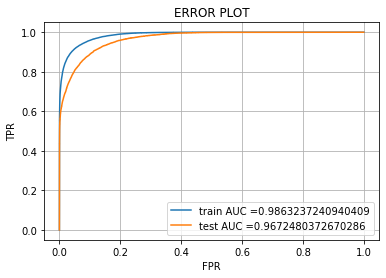

the maximum value of tpr*(1-fpr) 0.8723551344139503 for threshold 0.157
Test confusion matrix
[[48668  4297]
 [ 1664 10560]] 



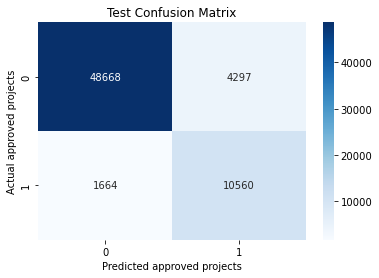

In [100]:
#the raph is train and CV data
#roc_auc graph for XGB+LGBM on set_5
sequence_fun(y_train_4,y_cv_4,predict_prob_val_train_xg_lg5[:,1],predict_prob_val_test_xg_lg5[:,1])

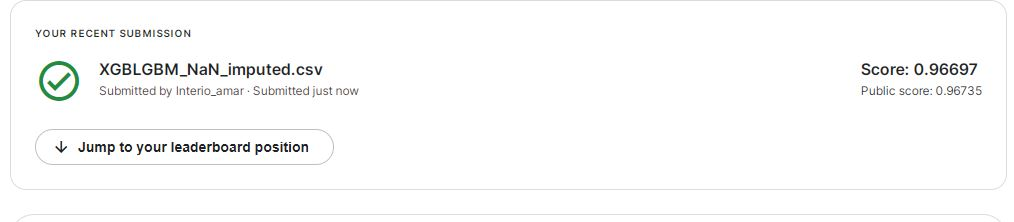

In [103]:
from IPython.display import Image
Image(filename='XGB+LGBM_NaN_imputed.JPG',width = 800, height = 300)